# import some helpful packages

In [1]:
# import some helpful packages

import numpy as np     # linear algebra
import pandas as pd       # data processing, CSV file I/O
import matplotlib.pyplot as plt     # for plotting data
import seaborn as sns     # used for statistical graph
from sklearn import model_selection  # for train test split
from sklearn import linear_model    # for model object

# reading train data set and explore

In [2]:
# reading train data

df=pd.read_csv("train.csv")
print(df.shape)

(114321, 133)


In [3]:
df[:5]  # view first 5 rows of data set

ID  target        v1        v2 v3        v4         v5        v6        v7  \
0   3       1  1.335739  8.727474  C  3.921026   7.915266  2.599278  3.176895   
1   4       1       NaN       NaN  C       NaN   9.191265       NaN       NaN   
2   5       1  0.943877  5.310079  C  4.410969   5.326159  3.979592  3.928571   
3   6       1  0.797415  8.304757  C  4.225930  11.627438  2.097700  1.987549   
4   8       1       NaN       NaN  C       NaN        NaN       NaN       NaN   

         v8  ...      v122      v123      v124  v125      v126      v127  \
0  0.012941  ...  8.000000  1.989780  0.035754    AU  1.804126  3.113719   
1  2.301630  ...       NaN       NaN  0.598896    AF       NaN       NaN   
2  0.019645  ...  9.333333  2.477596  0.013452    AE  1.773709  3.922193   
3  0.171947  ...  7.018256  1.812795  0.002267    CJ  1.415230  2.954381   
4       NaN  ...       NaN       NaN       NaN     Z       NaN       NaN   

       v128  v129      v130      v131  
0  2.024285     0  0.636365  2.857144  
1  1.957825     0       NaN       NaN  
2  1.120468     2  0.883118  1.176472  
3  1.990847     1  1.677108  1.034483  
4       NaN     0       NaN       NaN  

[5 rows x 133 columns]

In [4]:
df.drop("ID",axis=1,inplace=True)     # ID is not required for our work

In [5]:
df[:5]    # again view first 5 rows of data set

target        v1        v2 v3        v4         v5        v6        v7  \
0       1  1.335739  8.727474  C  3.921026   7.915266  2.599278  3.176895   
1       1       NaN       NaN  C       NaN   9.191265       NaN       NaN   
2       1  0.943877  5.310079  C  4.410969   5.326159  3.979592  3.928571   
3       1  0.797415  8.304757  C  4.225930  11.627438  2.097700  1.987549   
4       1       NaN       NaN  C       NaN        NaN       NaN       NaN   

         v8         v9  ...      v122      v123      v124  v125      v126  \
0  0.012941   9.999999  ...  8.000000  1.989780  0.035754    AU  1.804126   
1  2.301630        NaN  ...       NaN       NaN  0.598896    AF       NaN   
2  0.019645  12.666667  ...  9.333333  2.477596  0.013452    AE  1.773709   
3  0.171947   8.965516  ...  7.018256  1.812795  0.002267    CJ  1.415230   
4       NaN        NaN  ...       NaN       NaN       NaN     Z       NaN   

       v127      v128  v129      v130      v131  
0  3.113719  2.024285     0  0.636365  2.857144  
1       NaN  1.957825     0       NaN       NaN  
2  3.922193  1.120468     2  0.883118  1.176472  
3  2.954381  1.990847     1  1.677108  1.034483  
4       NaN       NaN     0       NaN       NaN  

[5 rows x 132 columns]

In [6]:
df.describe()    # see the data range

target            v1            v2            v4            v5  \
count  114321.000000  6.448900e+04  6.452500e+04  6.452500e+04  6.569700e+04   
mean        0.761199  1.630686e+00  7.464411e+00  4.145098e+00  8.742359e+00   
std         0.426353  1.082813e+00  2.961676e+00  1.148263e+00  2.036018e+00   
min         0.000000 -9.996497e-07 -9.817614e-07 -6.475929e-07 -5.287068e-07   
25%         1.000000  9.135798e-01  5.316428e+00  3.487398e+00  7.605918e+00   
50%         1.000000  1.469550e+00  7.023803e+00  4.205991e+00  8.670867e+00   
75%         1.000000  2.136128e+00  9.465497e+00  4.833250e+00  9.771353e+00   
max         1.000000  2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01   

                 v6            v7            v8            v9           v10  \
count  6.448900e+04  6.448900e+04  6.570200e+04  6.447000e+04  1.142370e+05   
mean   2.436402e+00  2.483921e+00  1.496569e+00  9.031859e+00  1.883046e+00   
std    5.999653e-01  5.894485e-01  2.783003e+00  1.930262e+00  1.393979e+00   
min   -9.055091e-07 -9.468765e-07 -7.783778e-07 -9.828757e-07 -9.875317e-07   
25%    2.065064e+00  2.101477e+00  8.658986e-02  7.853659e+00  1.050328e+00   
50%    2.412790e+00  2.452166e+00  3.860317e-01  9.059582e+00  1.312910e+00   
75%    2.775285e+00  2.834285e+00  1.625246e+00  1.023256e+01  2.100657e+00   
max    2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01  1.853392e+01   

       ...          v121          v122          v123          v124  \
count  ...  6.448100e+04  6.447000e+04  63643.000000  6.570200e+04   
mean   ...  2.737596e+00  6.822439e+00      3.549938  9.198120e-01   
std    ...  1.356294e+00  1.795978e+00      2.604704  2.099407e+00   
min    ... -9.820642e-07 -9.978497e-07      0.019139 -9.994953e-07   
25%    ...  1.786965e+00  5.647712e+00      1.963315  2.053777e-02   
50%    ...  2.436195e+00  6.749117e+00      2.739239  1.398639e-01   
75%    ...  3.379175e+00  7.911392e+00      4.075361  8.718333e-01   
max    ...  2.000000e+01  2.000000e+01     19.686069  2.000000e+01   

               v126          v127          v128           v129          v130  \
count  6.448900e+04  6.448900e+04  6.569700e+04  114321.000000  6.447800e+04   
mean   1.672658e+00  3.239542e+00  2.030373e+00       0.310144  1.925763e+00   
std    5.031683e-01  1.625988e+00  1.074232e+00       0.693262  1.264497e+00   
min   -9.564174e-07 -9.223798e-07  8.197812e-07       0.000000 -9.901257e-07   
25%    1.417600e+00  2.101900e+00  1.393830e+00       0.000000  1.106172e+00   
50%    1.614802e+00  2.963620e+00  1.798436e+00       0.000000  1.560138e+00   
75%    1.843886e+00  4.108146e+00  2.390158e+00       0.000000  2.332425e+00   
max    1.563161e+01  2.000000e+01  2.000000e+01      11.000000  2.000000e+01   

               v131  
count  6.442600e+04  
mean   1.739389e+00  
std    1.134702e+00  
min   -9.999134e-07  
25%    1.012658e+00  
50%    1.589403e+00  
75%    2.261905e+00  
max    2.000000e+01  

[8 rows x 113 columns]

In [7]:
df.describe(include="object")    # string valued columns

v3     v22     v24    v30     v31     v47     v52     v56     v66  \
count   110864  113821  114321  54211  110864  114321  114318  107439  114321   
unique       3   18210       5      7       3      10      12     122       3   
top          C    AGDF       E      C       A       C       J      BW       A   
freq    110584    2386   55177  32178   88347   55425   11103   11351   70353   

           v71     v74     v75     v79     v91    v107    v110    v112   v113  \
count   114321  114321  114321  114321  114318  114318  114321  113939  59017   
unique       9       3       4      18       7       7       3      22     36   
top          F       B       D       C       A       E       A       F      G   
freq     75094  113560   75087   34561   27079   27079   55688   21671  16252   

          v125  
count   114244  
unique      90  
top         BM  
freq      5759

In [8]:
df.describe(include="int64")    # integer columns

target            v38            v62            v72  \
count  114321.000000  114321.000000  114321.000000  114321.000000   
mean        0.761199       0.090928       1.030694       1.431767   
std         0.426353       0.583478       0.696244       0.922267   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       1.000000       1.000000   
50%         1.000000       0.000000       1.000000       1.000000   
75%         1.000000       0.000000       1.000000       2.000000   
max         1.000000      12.000000       7.000000      12.000000   

                v129  
count  114321.000000  
mean        0.310144  
std         0.693262  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        11.000000

In [9]:
df.describe(include="float64")    # floating valued columns

v1            v2            v4            v5            v6  \
count  6.448900e+04  6.452500e+04  6.452500e+04  6.569700e+04  6.448900e+04   
mean   1.630686e+00  7.464411e+00  4.145098e+00  8.742359e+00  2.436402e+00   
std    1.082813e+00  2.961676e+00  1.148263e+00  2.036018e+00  5.999653e-01   
min   -9.996497e-07 -9.817614e-07 -6.475929e-07 -5.287068e-07 -9.055091e-07   
25%    9.135798e-01  5.316428e+00  3.487398e+00  7.605918e+00  2.065064e+00   
50%    1.469550e+00  7.023803e+00  4.205991e+00  8.670867e+00  2.412790e+00   
75%    2.136128e+00  9.465497e+00  4.833250e+00  9.771353e+00  2.775285e+00   
max    2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01   

                 v7            v8            v9           v10           v11  \
count  6.448900e+04  6.570200e+04  6.447000e+04  1.142370e+05  6.448500e+04   
mean   2.483921e+00  1.496569e+00  9.031859e+00  1.883046e+00  1.544741e+01   
std    5.894485e-01  2.783003e+00  1.930262e+00  1.393979e+00  7.900790e-01   
min   -9.468765e-07 -7.783778e-07 -9.828757e-07 -9.875317e-07 -1.459062e-07   
25%    2.101477e+00  8.658986e-02  7.853659e+00  1.050328e+00  1.500000e+01   
50%    2.452166e+00  3.860317e-01  9.059582e+00  1.312910e+00  1.549595e+01   
75%    2.834285e+00  1.625246e+00  1.023256e+01  2.100657e+00  1.595000e+01   
max    2.000000e+01  2.000000e+01  2.000000e+01  1.853392e+01  2.000000e+01   

       ...          v120          v121          v122          v123  \
count  ...  6.448500e+04  6.448100e+04  6.447000e+04  63643.000000   
mean   ...  1.291218e+00  2.737596e+00  6.822439e+00      3.549938   
std    ...  7.383739e-01  1.356294e+00  1.795978e+00      2.604704   
min    ... -9.932534e-07 -9.820642e-07 -9.978497e-07      0.019139   
25%    ...  7.758620e-01  1.786965e+00  5.647712e+00      1.963315   
50%    ...  1.144708e+00  2.436195e+00  6.749117e+00      2.739239   
75%    ...  1.647220e+00  3.379175e+00  7.911392e+00      4.075361   
max    ...  1.039427e+01  2.000000e+01  2.000000e+01     19.686069   

               v124          v126          v127          v128          v130  \
count  6.570200e+04  6.448900e+04  6.448900e+04  6.569700e+04  6.447800e+04   
mean   9.198120e-01  1.672658e+00  3.239542e+00  2.030373e+00  1.925763e+00   
std    2.099407e+00  5.031683e-01  1.625988e+00  1.074232e+00  1.264497e+00   
min   -9.994953e-07 -9.564174e-07 -9.223798e-07  8.197812e-07 -9.901257e-07   
25%    2.053777e-02  1.417600e+00  2.101900e+00  1.393830e+00  1.106172e+00   
50%    1.398639e-01  1.614802e+00  2.963620e+00  1.798436e+00  1.560138e+00   
75%    8.718333e-01  1.843886e+00  4.108146e+00  2.390158e+00  2.332425e+00   
max    2.000000e+01  1.563161e+01  2.000000e+01  2.000000e+01  2.000000e+01   

               v131  
count  6.442600e+04  
mean   1.739389e+00  
std    1.134702e+00  
min   -9.999134e-07  
25%    1.012658e+00  
50%    1.589403e+00  
75%    2.261905e+00  
max    2.000000e+01  

[8 rows x 108 columns]

# Null value analysis

In [10]:
nullcol = list()
print("Number of columns with null value:",end=" ")
for col in df:
    if(df[col].isna().sum())!=0:
        nullcol.append(col)
print(len(nullcol),end="\n\n")
print("Number of columns with no null value:",end=" ")
nonnullcol = list()
for col in df:
    if(df[col].isna().sum())==0:
        nonnullcol.append(col)
print(len(nonnullcol),end="\n\n")
print("Columns with null value(percentage):")
for col in df:
    if(df[col].isna().sum())!=0:
        print(col,round(((df[col].isna().sum())/df.shape[0])*100,2),end=" // ")

Number of columns with null value: 119

Number of columns with no null value: 13

Columns with null value(percentage):
v1 43.59 // v2 43.56 // v3 3.02 // v4 43.56 // v5 42.53 // v6 43.59 // v7 43.59 // v8 42.53 // v9 43.61 // v10 0.07 // v11 43.59 // v12 0.08 // v13 43.59 // v14 0.0 // v15 43.59 // v16 43.64 // v17 43.56 // v18 43.59 // v19 43.6 // v20 43.6 // v21 0.53 // v22 0.44 // v23 44.33 // v25 42.53 // v26 43.59 // v27 43.59 // v28 43.59 // v29 43.59 // v30 52.58 // v31 3.02 // v32 43.59 // v33 43.59 // v34 0.1 // v35 43.59 // v36 42.53 // v37 43.6 // v39 43.59 // v40 0.1 // v41 43.59 // v42 43.59 // v43 43.59 // v44 43.56 // v45 43.59 // v46 42.53 // v48 43.56 // v49 43.59 // v50 0.08 // v51 44.33 // v52 0.0 // v53 43.59 // v54 42.53 // v55 43.59 // v56 6.02 // v57 43.59 // v58 43.59 // v59 43.56 // v60 43.59 // v61 43.56 // v63 42.53 // v64 43.56 // v65 43.6 // v67 43.59 // v68 43.59 // v69 43.64 // v70 42.54 // v73 43.59 // v76 43.56 // v77 43.59 // v78 43.64 // v80 43.61 // 

In [11]:
print("columns with no null value:",*nonnullcol)   # so 4 integer columns have no null value and some other string coluns also
df[nonnullcol][:10]

columns with no null value: target v24 v38 v47 v62 v66 v71 v72 v74 v75 v79 v110 v129


target v24  v38 v47  v62 v66 v71  v72 v74 v75 v79 v110  v129
0       1   C    0   C    1   C   F    1   B   D   E    B     0
1       1   C    0   E    2   A   F    2   B   D   D    A     0
2       1   E    0   C    1   A   B    3   B   B   E    B     2
3       1   D    0   C    1   A   F    2   B   D   B    B     1
4       1   E    0   I    1   C   F    1   B   D   C    A     0
5       0   A    0   I    1   A   F    1   B   D   I    A     0
6       0   E    0   C    2   A   F    2   B   D   E    B     0
7       1   D    0   I    2   C   F    2   B   D   C    A     0
8       0   E    0   D    0   B   B    0   B   B   P    C     0
9       1   C    0   I    3   A   F    3   B   D   C    A     0

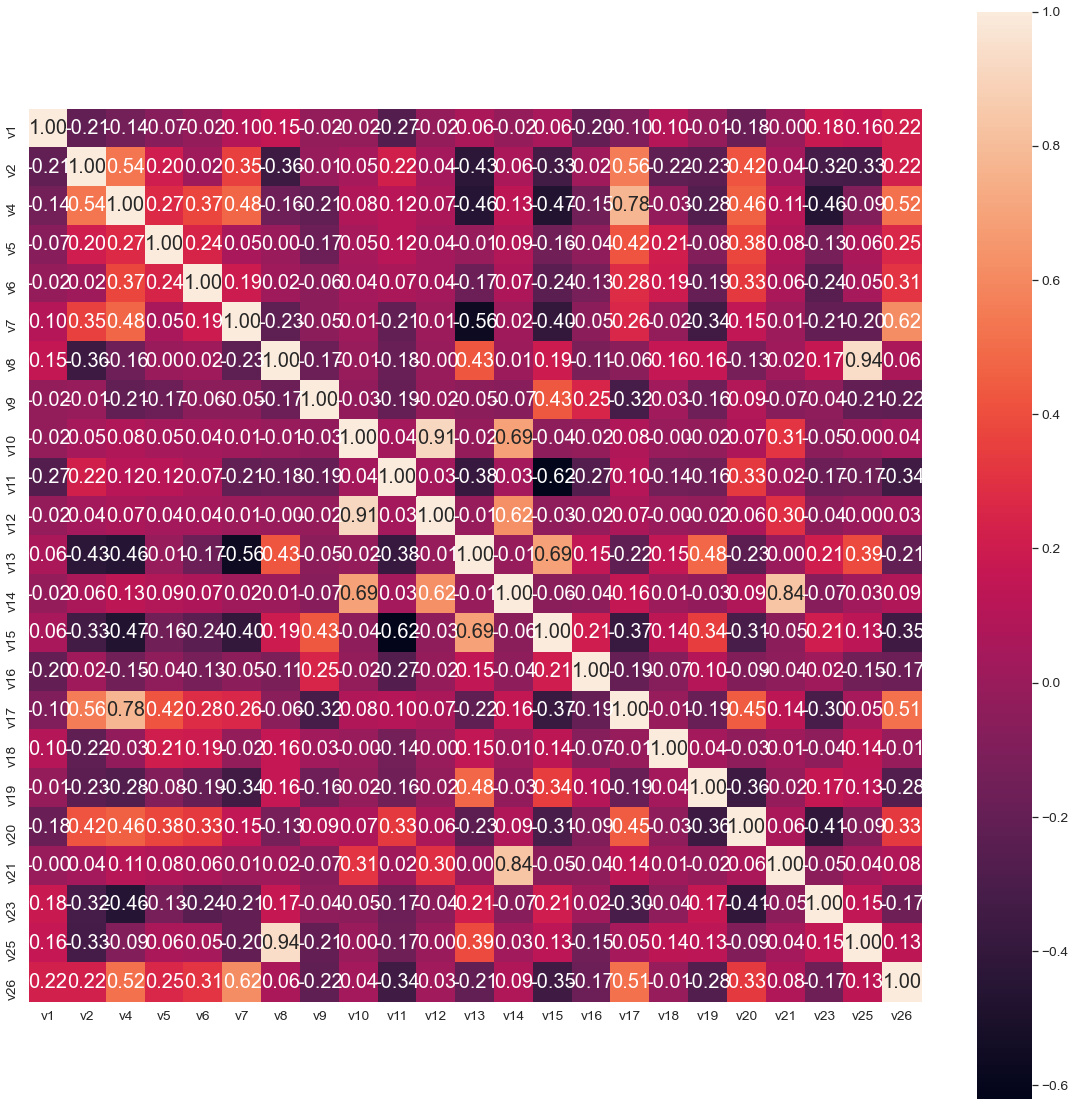

In [12]:
# ploting correlation of columns(v1 to v26) in heatmap to see correlation between two column

cols = list()
for i in range(1,27):
    a = "v"+str(i)
    cols.append(a)
df_corr = df[cols]
corr=df_corr.corr()
sns.set(font_scale=1.25)
plt.figure(figsize=(20,20))
hm = sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=corr.columns.values, xticklabels=corr.columns.values, linecolor='white')
plt.show()

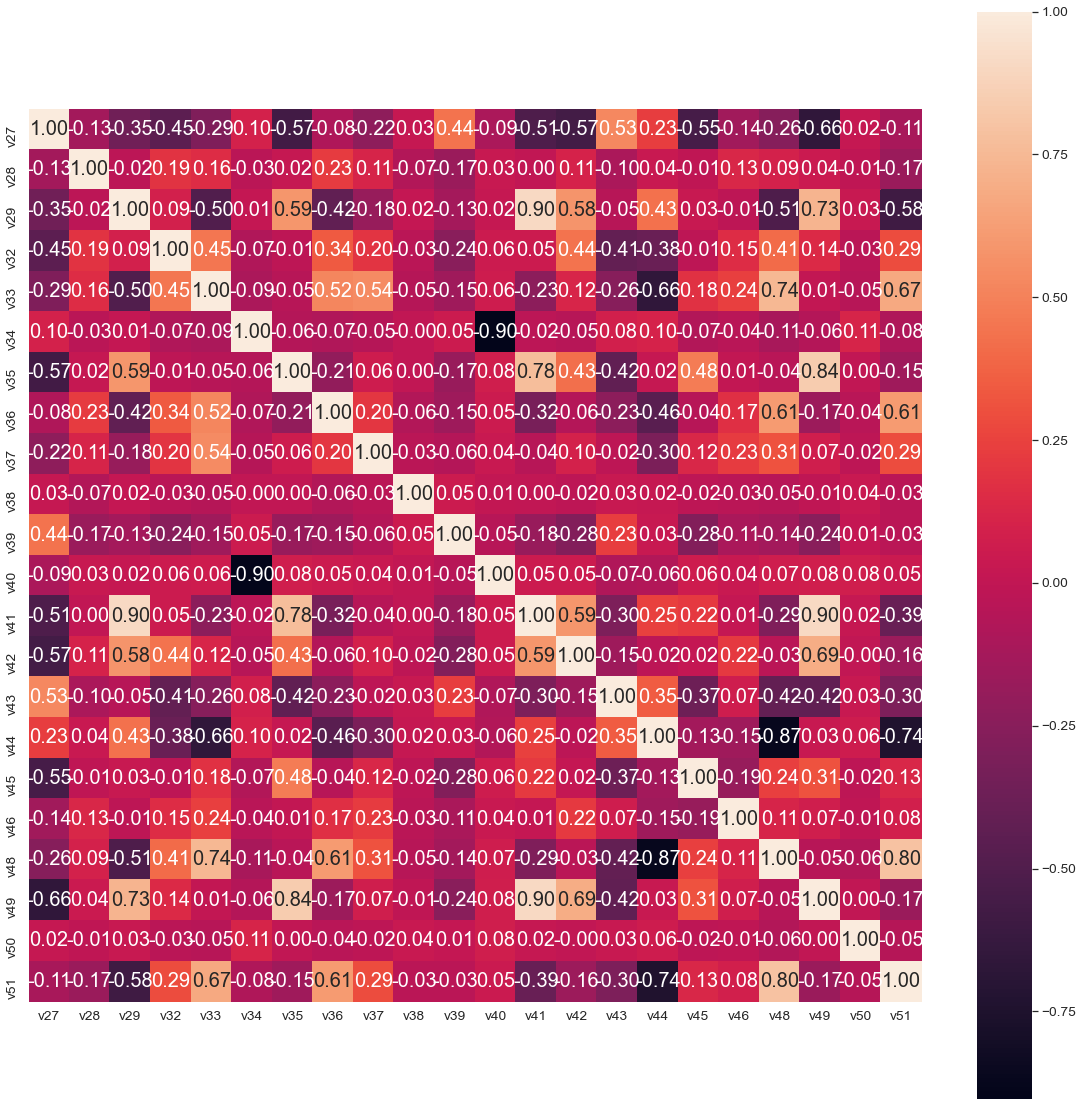

In [13]:
# ploting correlation of columns(v27 to v52) in heatmap to see correlation between two column

cols = list()
for i in range(27,53):
    a = "v"+str(i)
    cols.append(a)
df_corr = df[cols]
corr=df_corr.corr()
sns.set(font_scale=1.25)
plt.figure(figsize=(20,20))
hm = sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=corr.columns.values, xticklabels=corr.columns.values, linecolor='white')
plt.show()

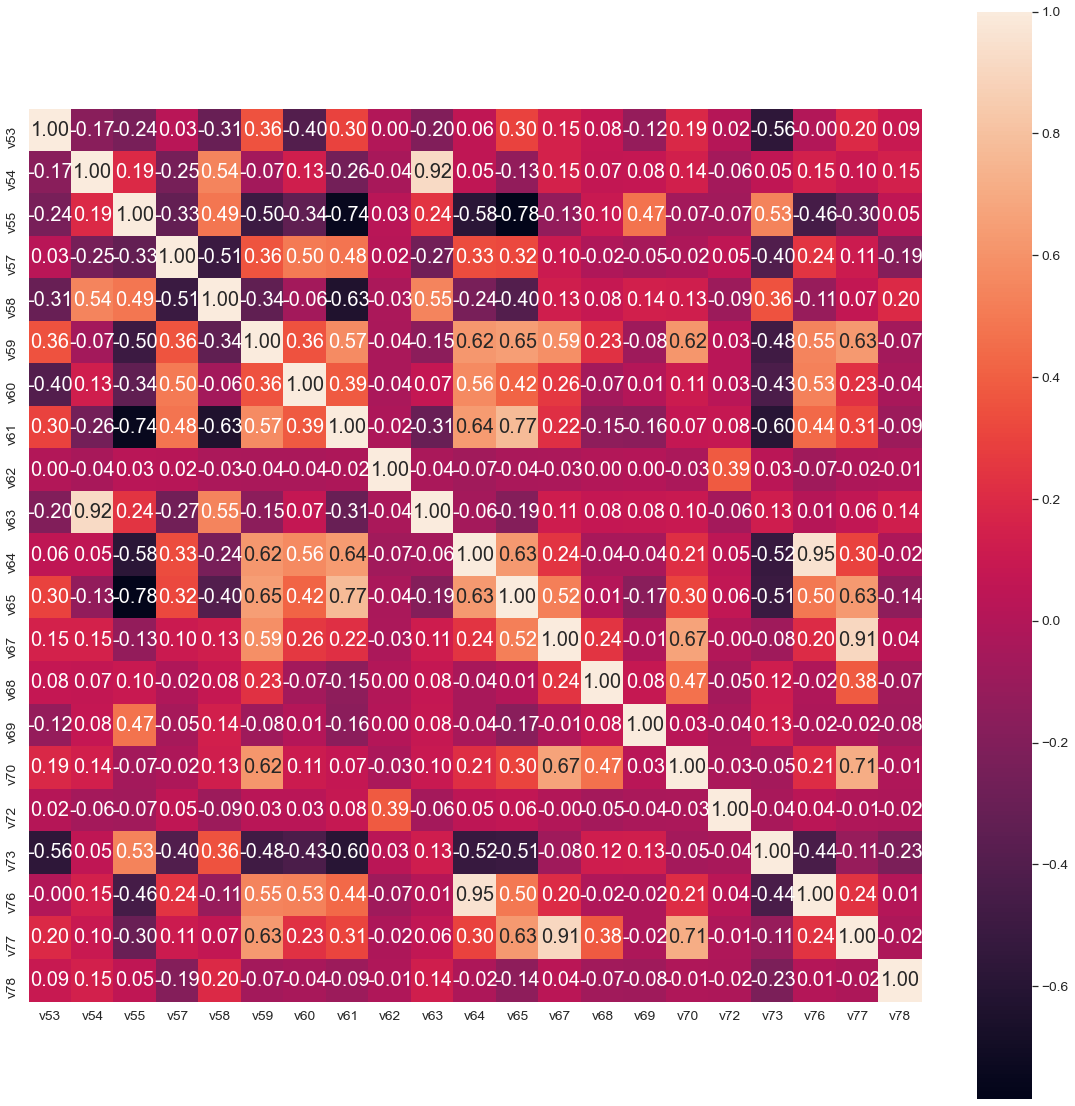

In [14]:
# ploting correlation of columns(v53 to v78) in heatmap to see correlation between two column

cols = list()
for i in range(53,79):
    a = "v"+str(i)
    cols.append(a)
df_corr = df[cols]
corr=df_corr.corr()
sns.set(font_scale=1.25)
plt.figure(figsize=(20,20))
hm = sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=corr.columns.values, xticklabels=corr.columns.values, linecolor='white')
plt.show()

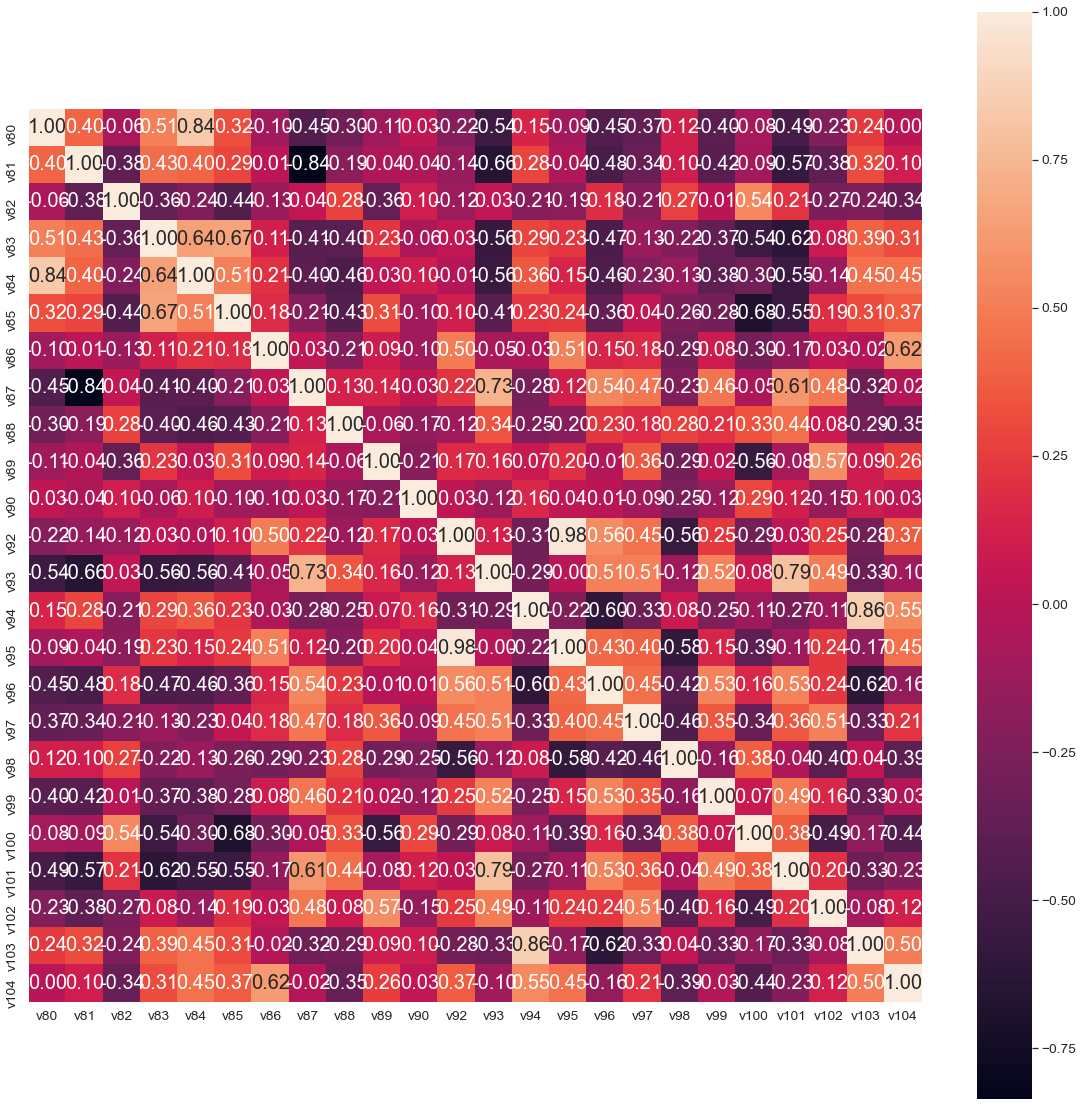

In [15]:
# ploting correlation of columns(v79 to v104) in heatmap to see correlation between two column

cols = list()
for i in range(79,105):
    a = "v"+str(i)
    cols.append(a)
df_corr = df[cols]
corr=df_corr.corr()
sns.set(font_scale=1.25)
plt.figure(figsize=(20,20))
hm = sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=corr.columns.values, xticklabels=corr.columns.values, linecolor='white')
plt.show()

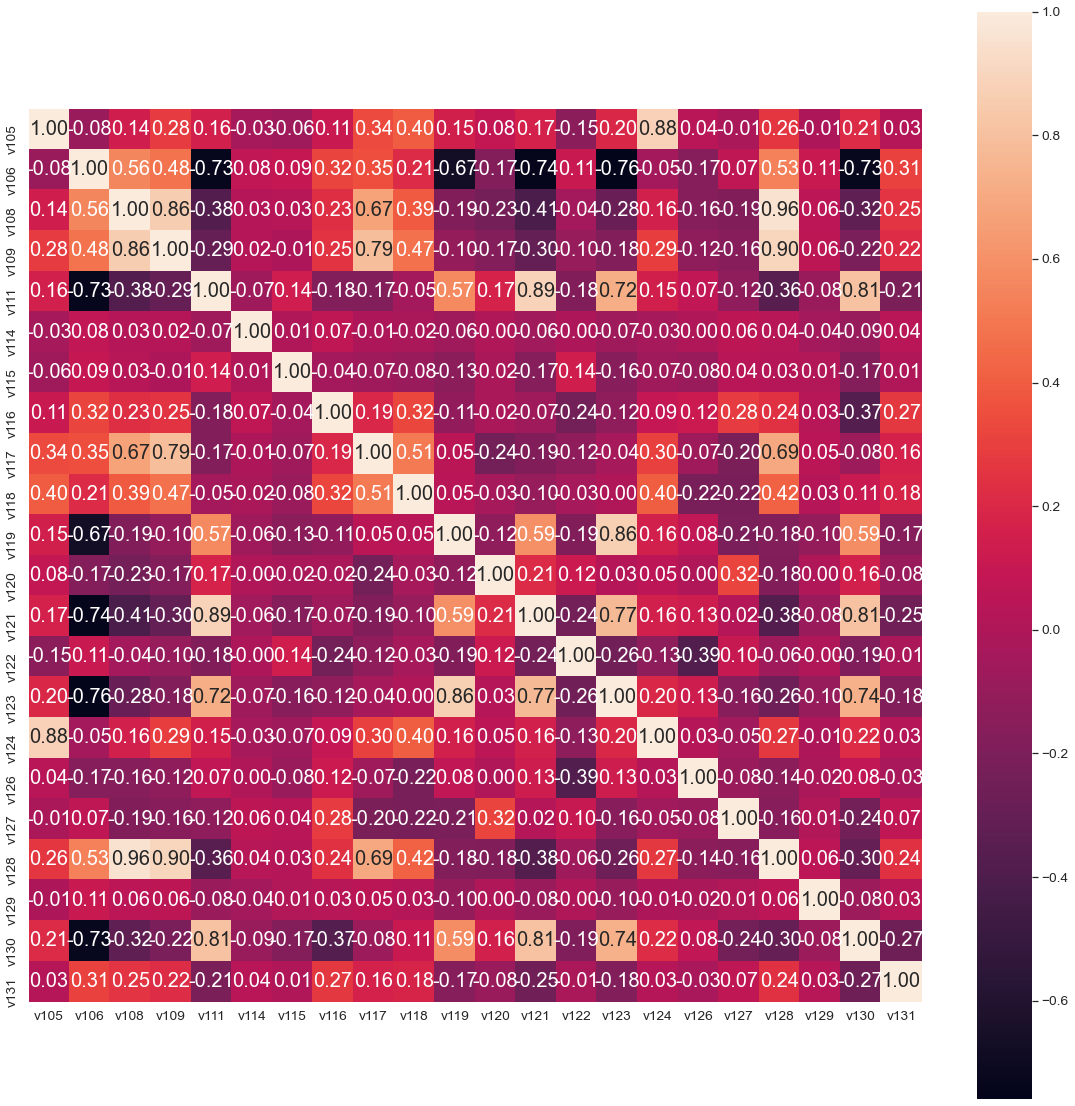

In [16]:
# ploting correlation of columns(v105 to v131) in heatmap to see correlation between two column

cols = list()
for i in range(105,132):
    a = "v"+str(i)
    cols.append(a)
df_corr = df[cols]
corr=df_corr.corr()
sns.set(font_scale=1.25)
plt.figure(figsize=(20,20))
hm = sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=corr.columns.values, xticklabels=corr.columns.values, linecolor='white')
plt.show()

Null value count graph


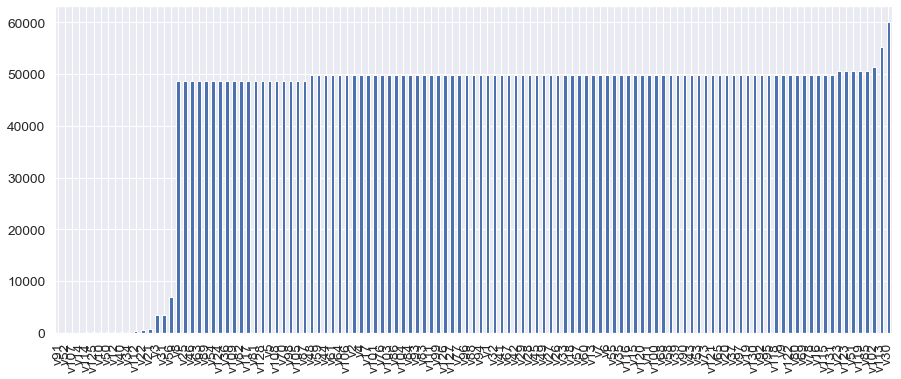

In [17]:
# plot of null value counts of columns to see the distribution of null values

print("Null value count graph")
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize=(15,6))
plt.show()

In [18]:
uselesscol = list()
for col in df:
    if(df[col].isna().sum())!=0:
        if ((df[col].isna().sum())/df.shape[0])*100>30:
            uselesscol.append(col)
print("There are ",len(uselesscol),"columns where null value is more than 30%")

There are  102 columns where null value is more than 30%


# Unique value count of each columns

In [19]:
objcols=df.select_dtypes(include="object").columns
floatcols=df.select_dtypes(include="float64").columns
intcols=df.select_dtypes(include="int64").columns

In [20]:
print("Number of object columns:",objcols.shape[0])
print("Unique value count of each object column:")
for col in df[objcols]:
    print(col," : ",df[col].nunique())

Number of object columns: 19
Unique value count of each object column:
v3  :  3
v22  :  18210
v24  :  5
v30  :  7
v31  :  3
v47  :  10
v52  :  12
v56  :  122
v66  :  3
v71  :  9
v74  :  3
v75  :  4
v79  :  18
v91  :  7
v107  :  7
v110  :  3
v112  :  22
v113  :  36
v125  :  90


In [21]:
print("Number of floating columns:",floatcols.shape[0])
print("Unique value count of each float64 column:")
for col in df[floatcols]:
    print(col," : ",df[col].nunique())

Number of floating columns: 108
Unique value count of each float64 column:
v1  :  64487
v2  :  64524
v4  :  64524
v5  :  65671
v6  :  64487
v7  :  64489
v8  :  65688
v9  :  64451
v10  :  112485
v11  :  64477
v12  :  114233
v13  :  64488
v14  :  110472
v15  :  64481
v16  :  64414
v17  :  64525
v18  :  64489
v19  :  64478
v20  :  64469
v21  :  113709
v23  :  63638
v25  :  65679
v26  :  64489
v27  :  64489
v28  :  64482
v29  :  64487
v32  :  64488
v33  :  64489
v34  :  114209
v35  :  64489
v36  :  65609
v37  :  64474
v39  :  64484
v40  :  114192
v41  :  64488
v42  :  64472
v43  :  64484
v44  :  64520
v45  :  64486
v46  :  65697
v48  :  64519
v49  :  64487
v50  :  114224
v51  :  63637
v53  :  64469
v54  :  65694
v55  :  64488
v57  :  64488
v58  :  64482
v59  :  64524
v60  :  64488
v61  :  64519
v63  :  65681
v64  :  64524
v65  :  64472
v67  :  64487
v68  :  64474
v69  :  64332
v70  :  65631
v73  :  64484
v76  :  64525
v77  :  64489
v78  :  64265
v80  :  64466
v81  :  65685
v82  :  65663
v8

In [22]:
print("Number of integer columns:",intcols.shape[0])
print("Unique value count of each integer column:")
for col in df[intcols]:
    print(col," : ",df[col].nunique())

Number of integer columns: 5
Unique value count of each integer column:
target  :  2
v38  :  12
v62  :  8
v72  :  13
v129  :  10


<AxesSubplot:xlabel='target', ylabel='count'>

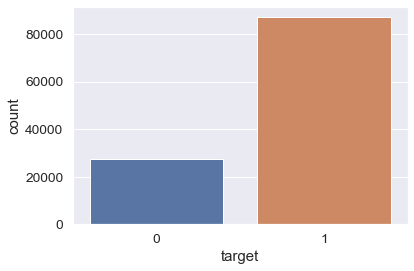

In [23]:
sns.countplot(x="target",data=df)   # distribution of target value

In [24]:
df["target"].value_counts()

1    87021
0    27300
Name: target, dtype: int64

# Exploratory data analysis

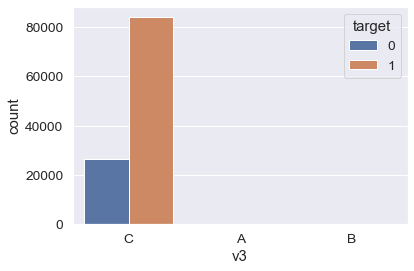

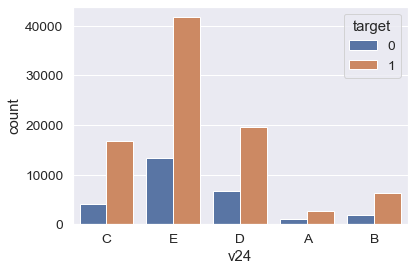

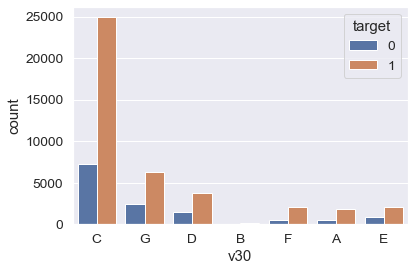

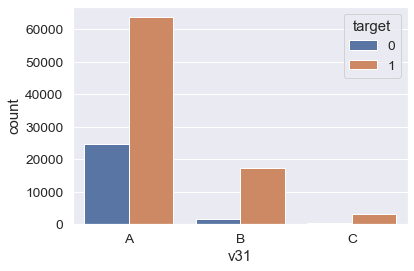

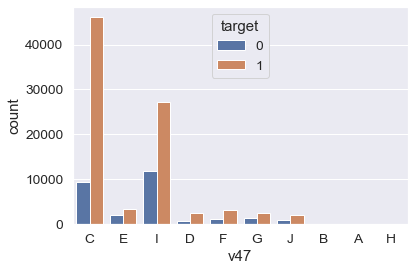

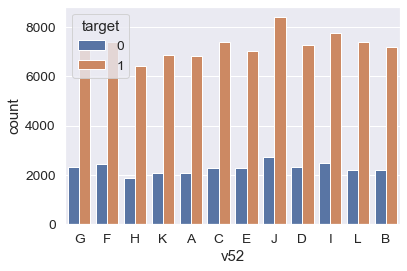

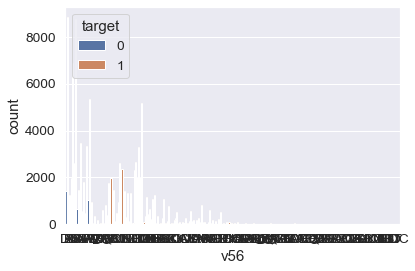

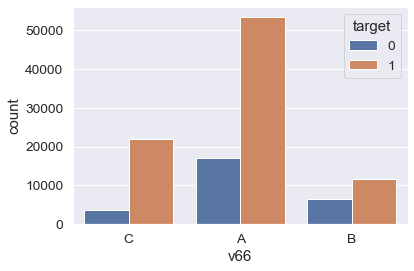

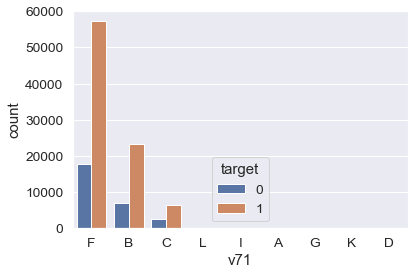

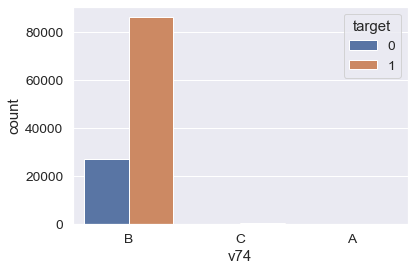

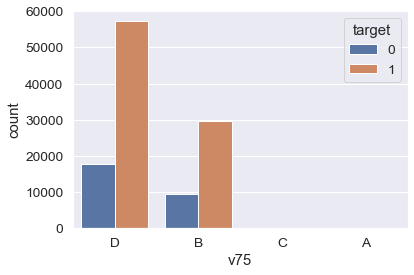

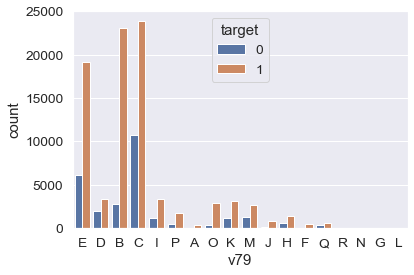

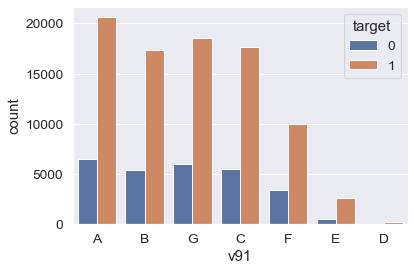

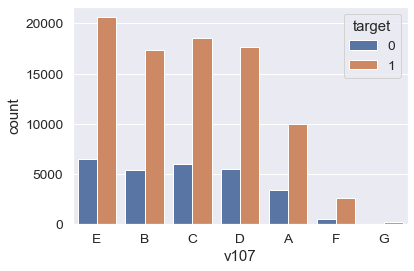

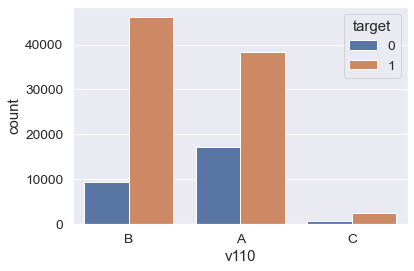

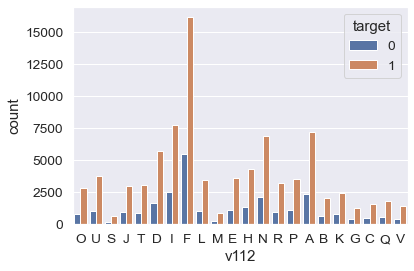

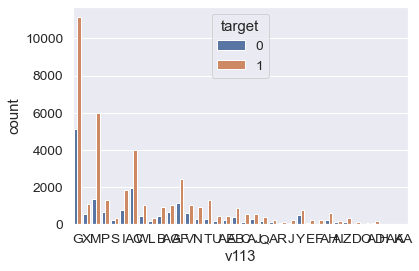

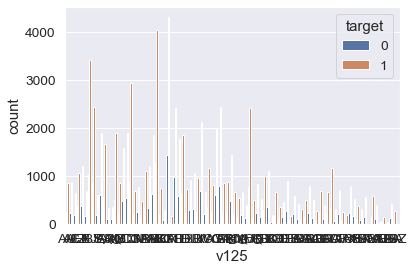

In [25]:
# countplot of categorical column to see the frequency of each catagorical data

for i,cols in enumerate(objcols):
    if cols=="v22":
        continue
        
    plt.figure(i)
    sns.countplot(x=cols,hue="target",data=df)

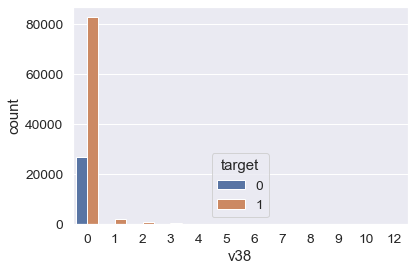

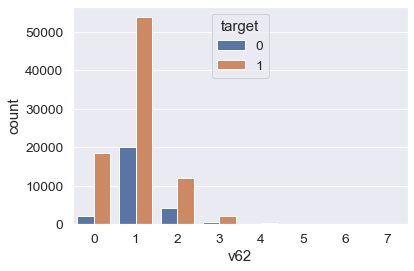

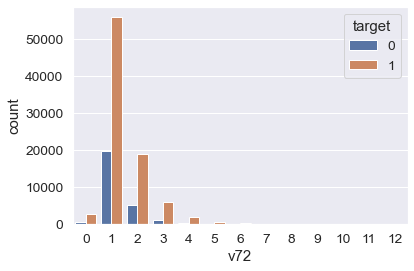

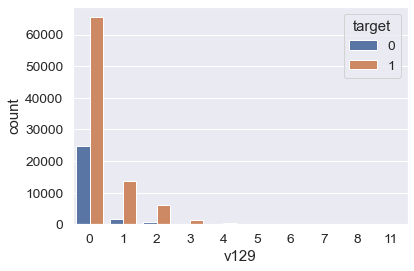

In [26]:
# countplot of integer(discrete) column to see the frequency of each catagorical data

for i,cols in enumerate(intcols):
    if cols=="target":
        continue
        
    plt.figure(i)
    sns.countplot(x=cols,hue="target",data=df)

<ipython-input-27-b19fcd736fc8>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


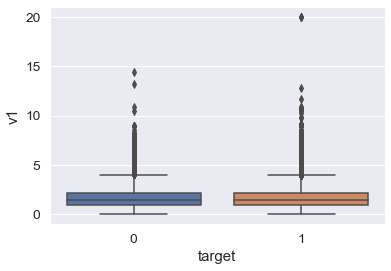

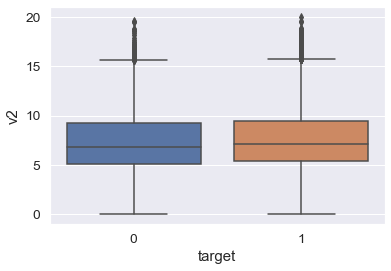

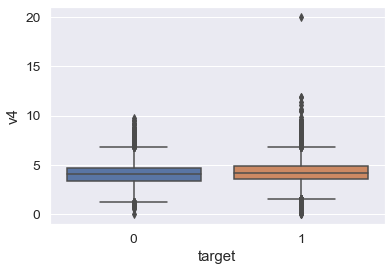

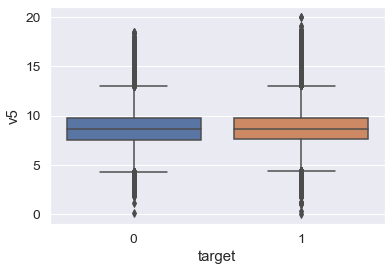

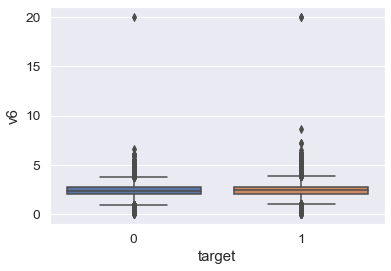

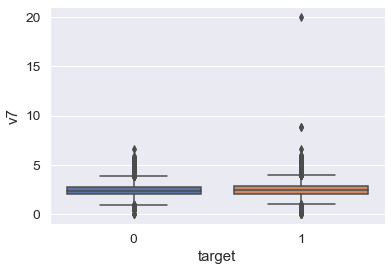

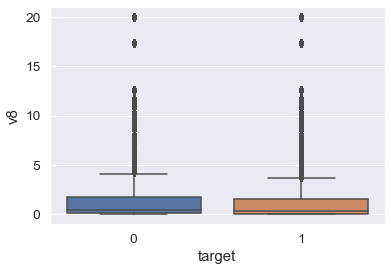

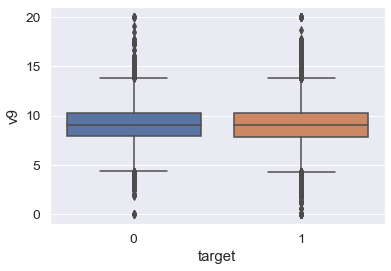

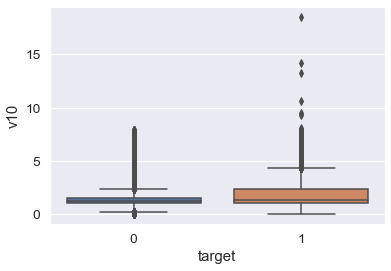

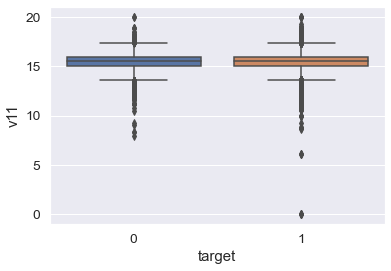

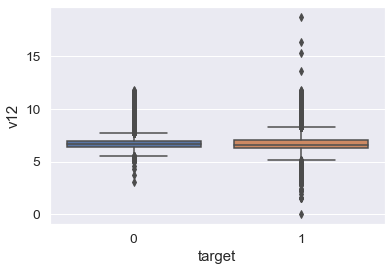

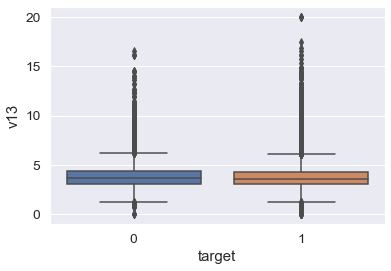

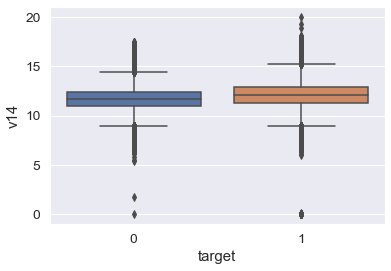

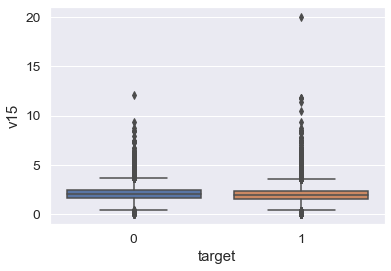

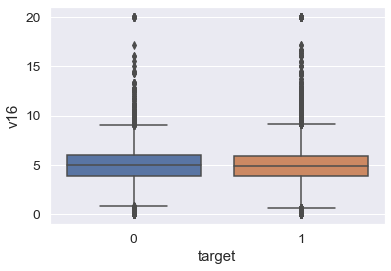

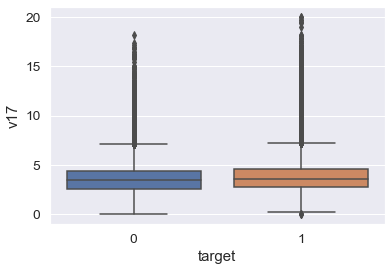

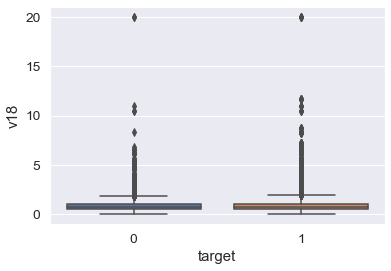

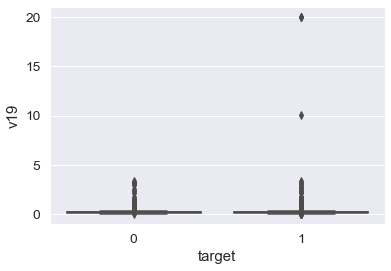

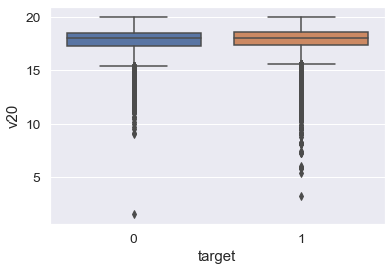

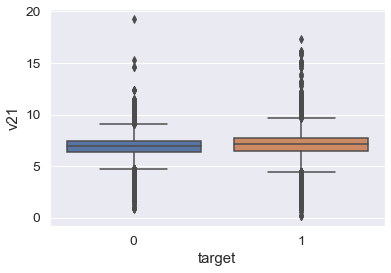

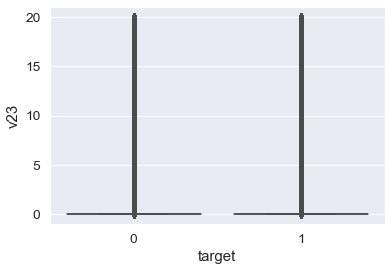

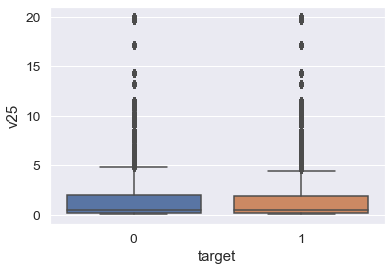

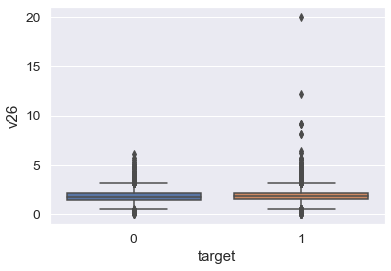

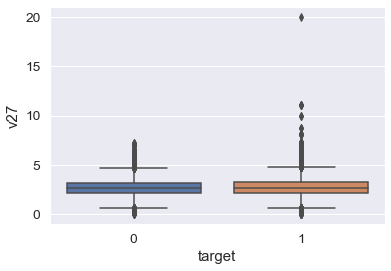

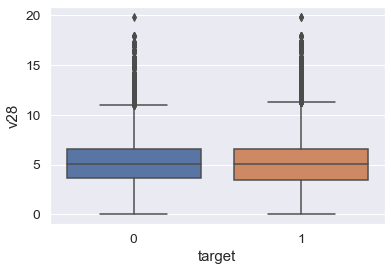

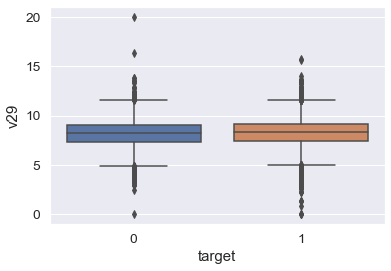

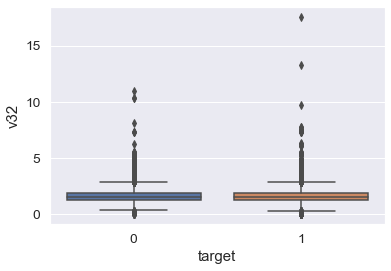

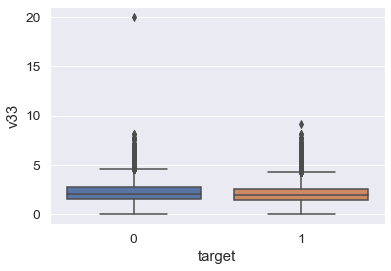

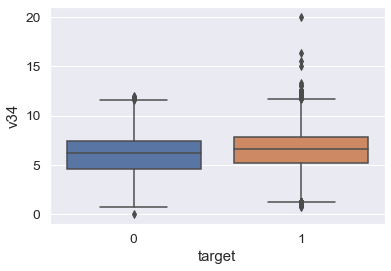

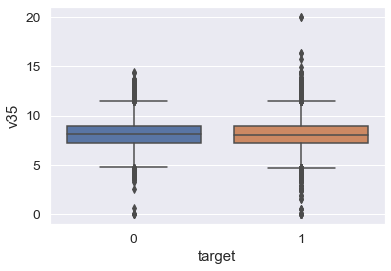

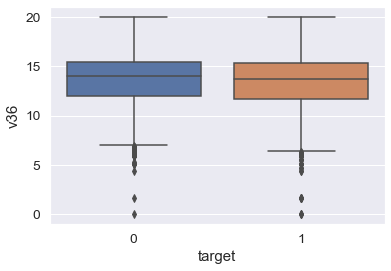

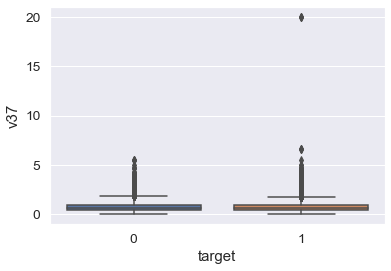

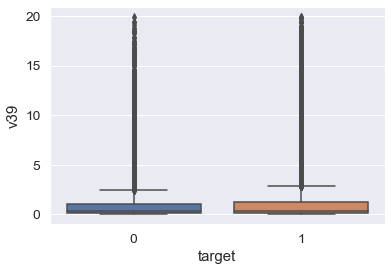

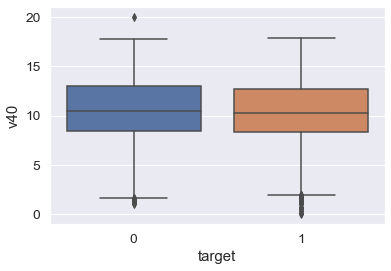

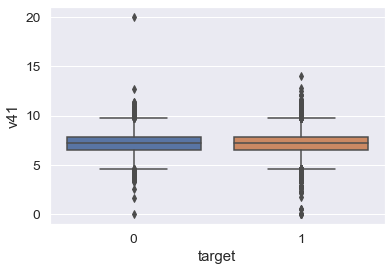

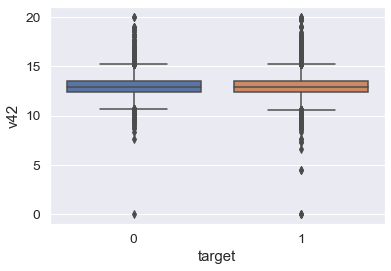

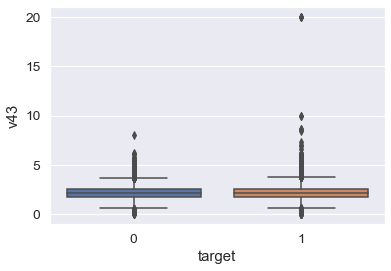

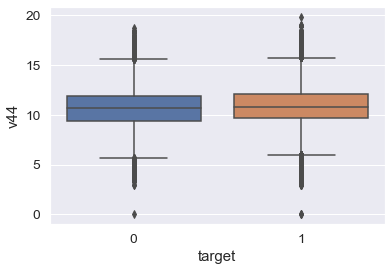

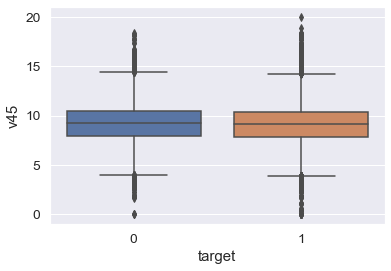

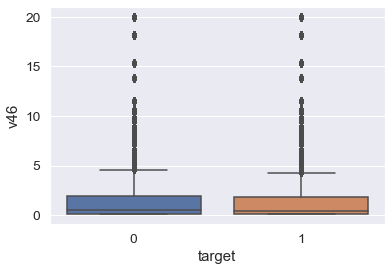

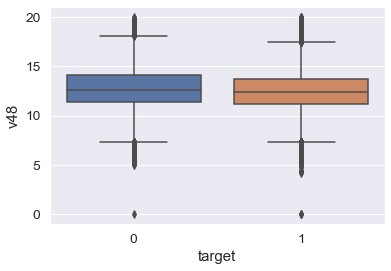

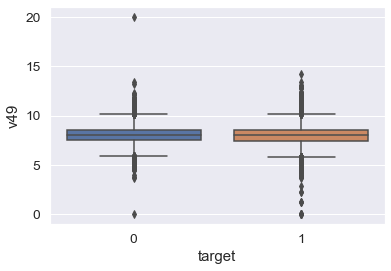

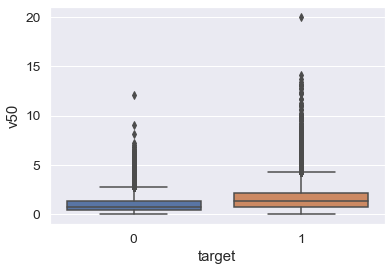

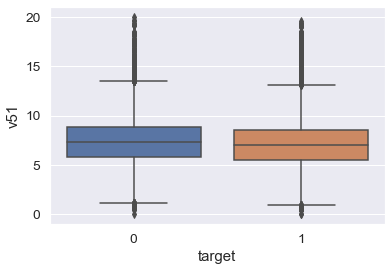

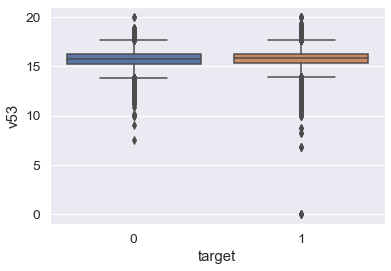

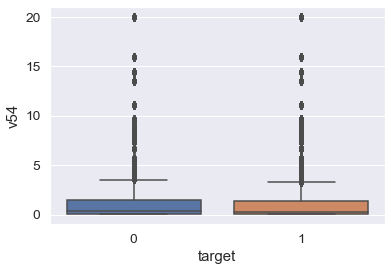

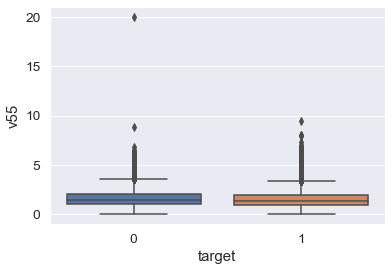

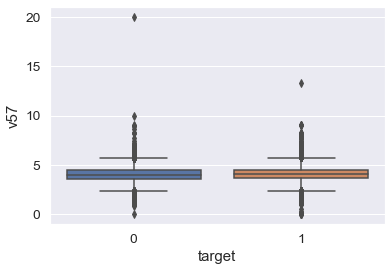

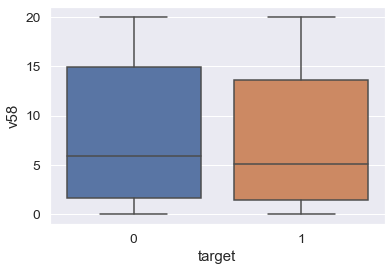

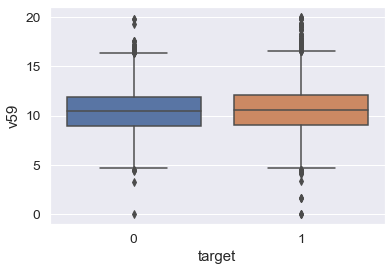

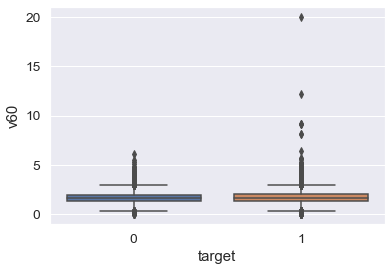

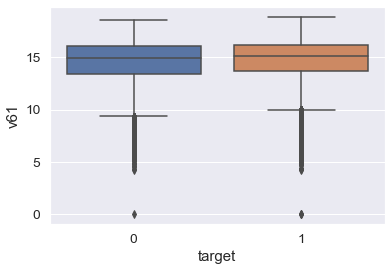

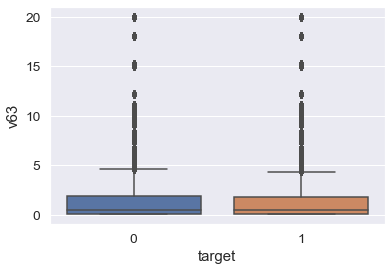

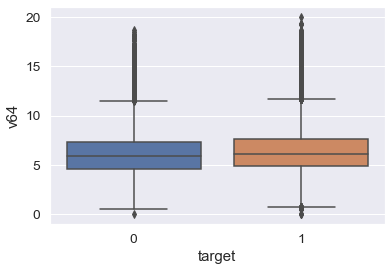

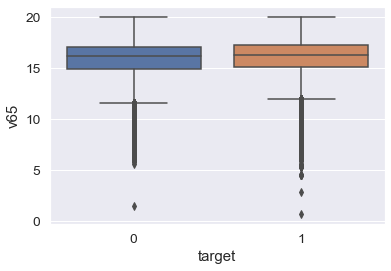

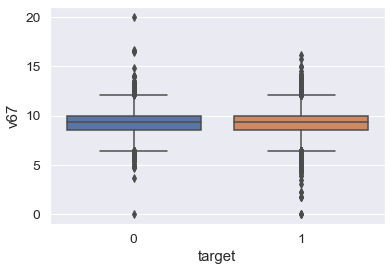

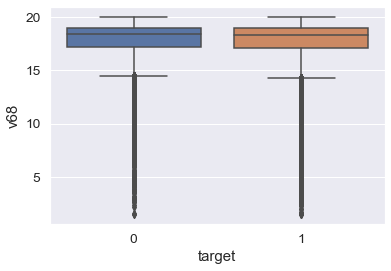

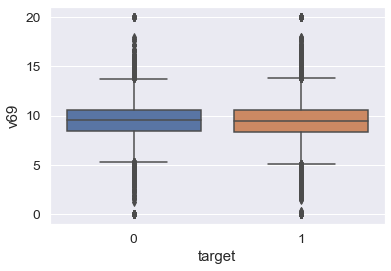

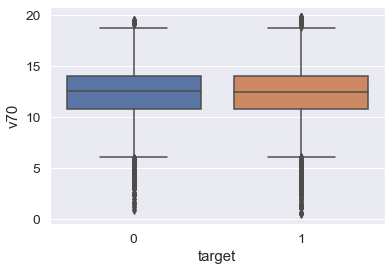

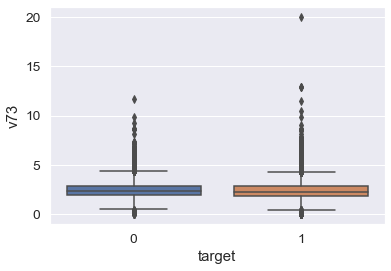

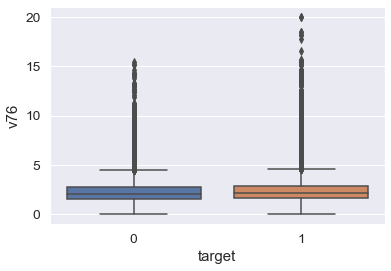

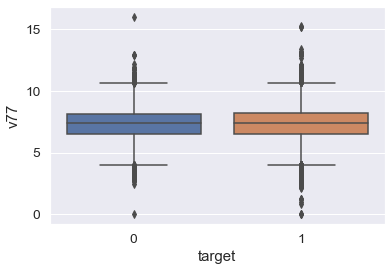

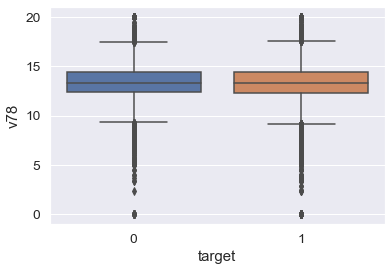

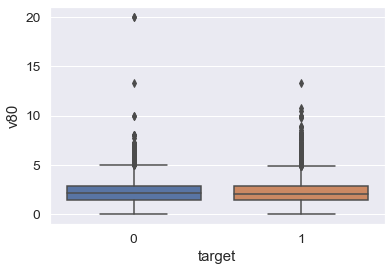

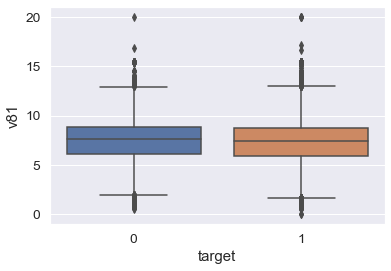

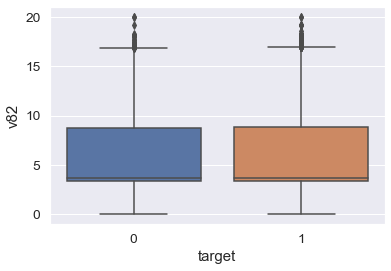

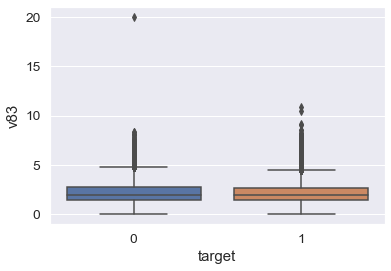

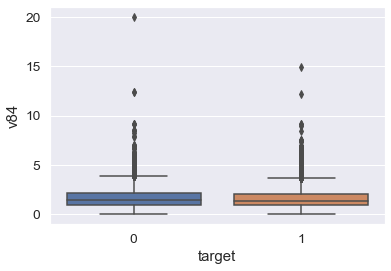

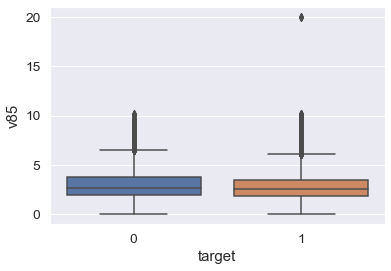

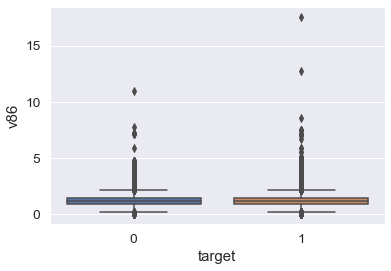

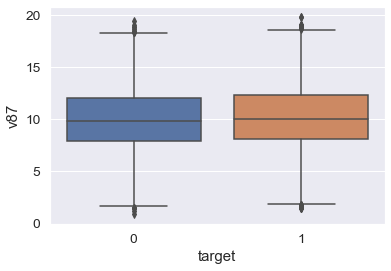

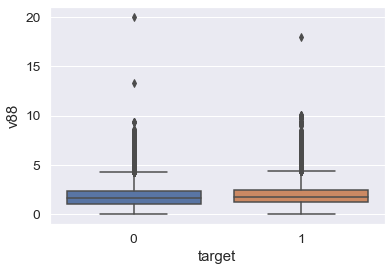

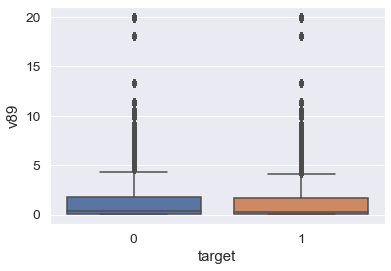

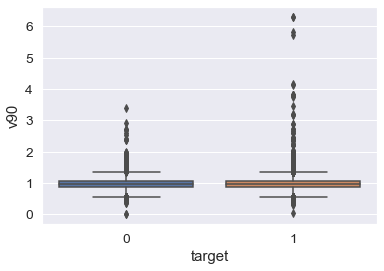

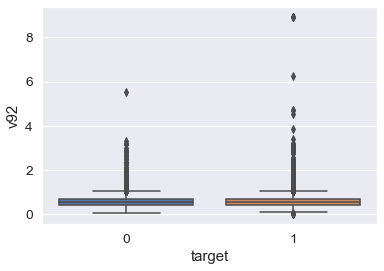

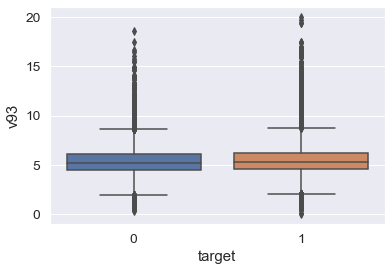

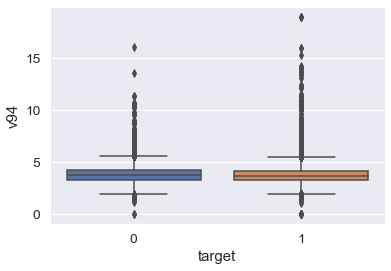

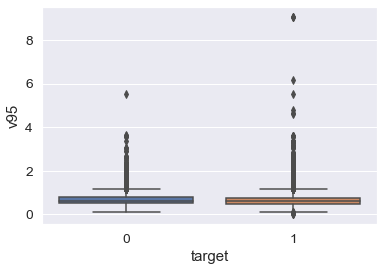

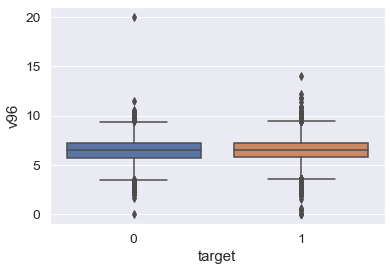

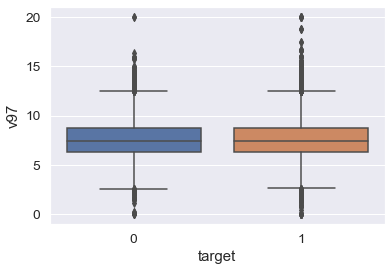

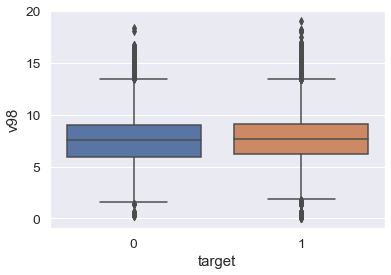

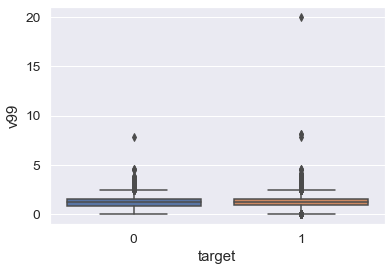

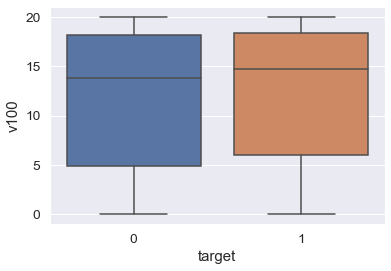

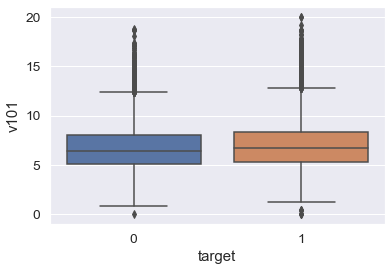

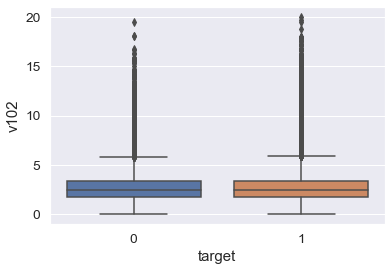

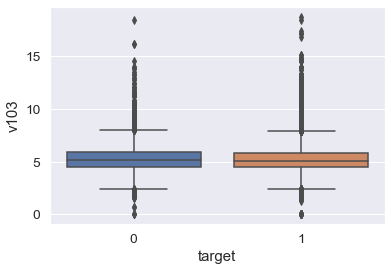

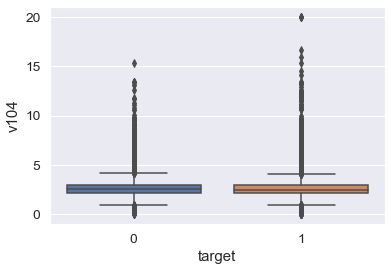

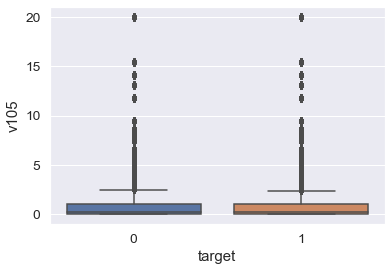

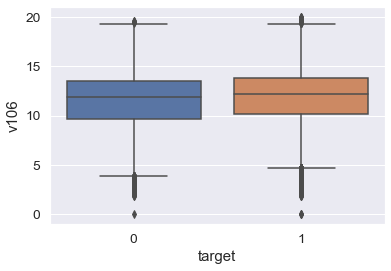

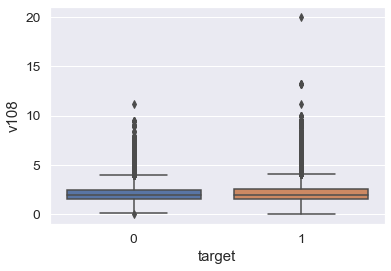

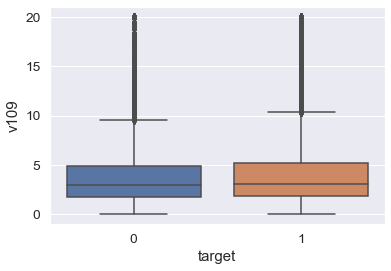

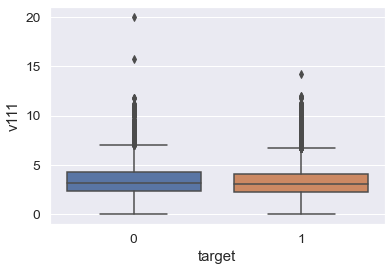

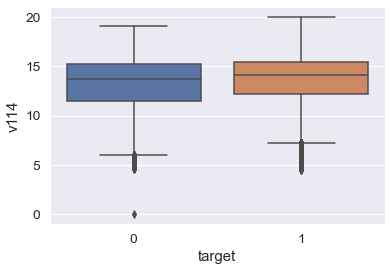

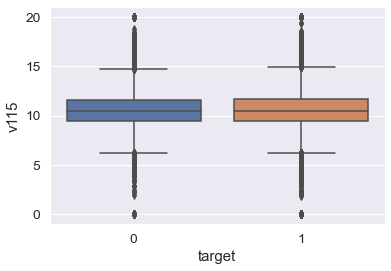

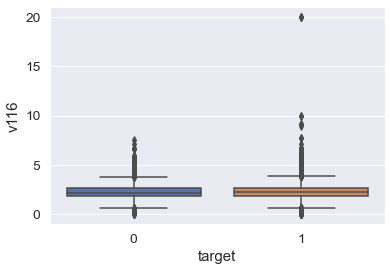

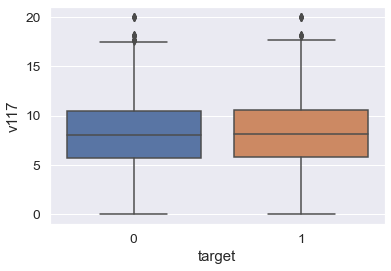

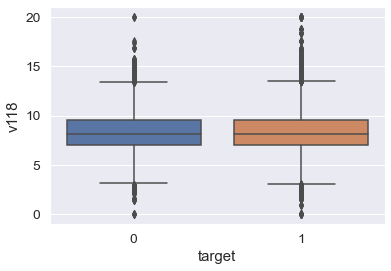

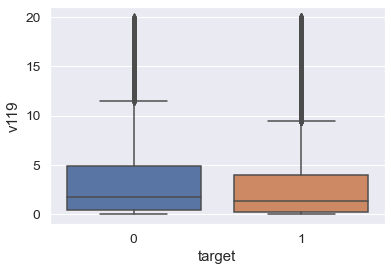

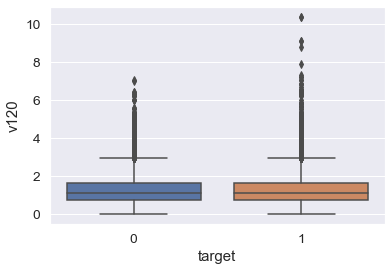

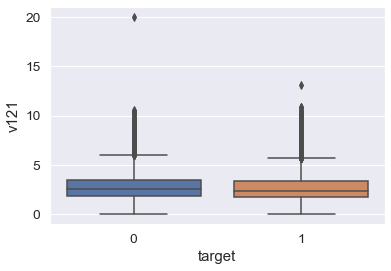

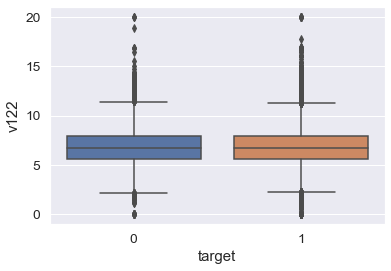

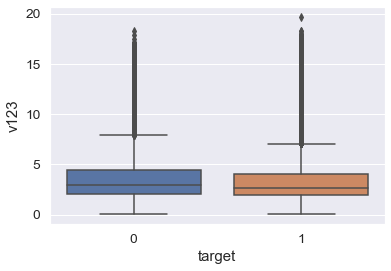

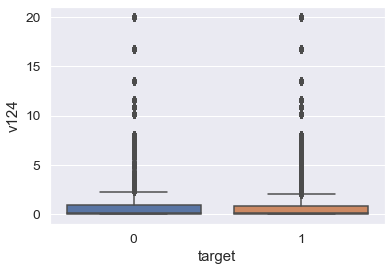

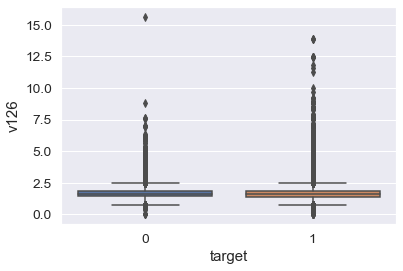

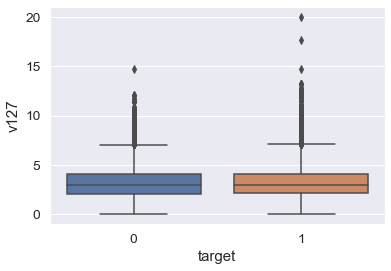

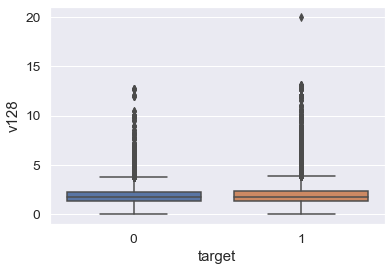

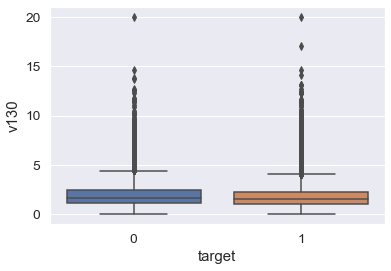

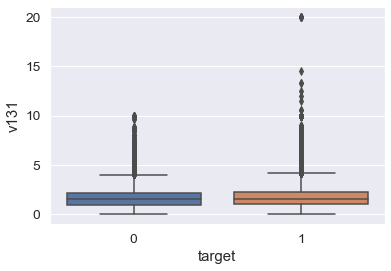

In [27]:
# box plot of floating columns to see the distribution of data

for i,cols in enumerate(floatcols):
    plt.figure(i)
    sns.boxplot(y=cols,x="target",data=df)

# Data Cleaning

In [28]:
pd.crosstab(index=df["v3"],columns=df["target"],normalize="columns")    # A and B value counts are very less compare to C in v3 column

target         0         1
v3                        
A       0.000376  0.002576
B       0.000225  0.000558
C       0.999399  0.996866

In [29]:
# column "v3" is dropped

df.drop("v3",axis=1,inplace=True)
print(df.shape)

(114321, 131)


In [30]:
pd.crosstab(index=df["v38"],columns=df["target"],normalize="columns")    # other value counts are very less compare to 0 in v38 column

target         0         1
v38                       
0       0.987106  0.951219
1       0.006923  0.022454
2       0.003297  0.012733
3       0.001062  0.005803
4       0.000513  0.002781
5       0.000476  0.001609
6       0.000073  0.000770
7       0.000183  0.000919
8       0.000000  0.000701
9       0.000037  0.000425
10      0.000330  0.000437
12      0.000000  0.000149

In [31]:
# column "v38" is dropped

df.drop("v38",axis=1,inplace=True)
print(df.shape)

(114321, 130)


In [32]:
pd.crosstab(index=df["v74"],columns=df["target"],normalize="columns")    # A and C value counts are very less compare to B in v74 column

target         0         1
v74                       
A       0.000256  0.000437
B       0.997473  0.992048
C       0.002271  0.007515

In [33]:
# column "v74" is dropped

df.drop("v74",axis=1,inplace=True)
print(df.shape)

(114321, 129)


# Null value handling

In [34]:
# fill NaN values with mean

for f in df.columns:
    if df[f].dtype == 'float64':
        m = df.groupby("target")[f].mean()
        df.loc[df.target==0,f]=df.loc[df.target==0,f].fillna(m[0])  # target=0 rows null value replaced with mean of all target=0 non null rows
        df.loc[df.target==1,f]=df.loc[df.target==1,f].fillna(m[1])  # target=0 rows null value replaced with mean of all target=0 non null rows

In [35]:
#  now see which columns are left with null values

nulcols = []
print("Columns with null value(percentage):")
for col in df:
    if(df[col].isna().sum())!=0:
        print(col,(((df[col].isna().sum())/df.shape[0])*100))
        nulcols.append(col)

Columns with null value(percentage):
v22 0.43736496356749854
v30 52.580015920084676
v31 3.023941358105685
v52 0.0026241897814049914
v56 6.01989135854305
v91 0.0026241897814049914
v107 0.0026241897814049914
v112 0.3341468321655689
v113 48.376063890273876
v125 0.06735420438939478


In [36]:
df[nulcols][:10]    # all columns with null values are object type

v22  v30  v31 v52  v56 v91 v107 v112 v113 v125
0   XDX    C    A   G   DI   A    E    O  NaN   AU
1   GUV    C    A   G   DY   B    B    U    G   AF
2    FQ  NaN    A   F   AS   G    C    S  NaN   AE
3  ACUE    C    B   H   BW   B    B    J  NaN   CJ
4   HIT  NaN    A   H  NaN   G    C    T    G    Z
5   AYX  NaN    A   K   DX   G    C    D    X    X
6   NFD    G    A   A   AS   B    B    I  NaN   BJ
7  AHBW    C    A   C   DP   A    E    F    M   BY
8   GKQ  NaN  NaN   H   AF   C    D    L  NaN    S
9   PYF    C    A   A  NaN   A    E    J    P    E

In [37]:
#filling "missing" in place of null values

for col in nulcols:
    df[col][df[col] != df[col]] = "missing"

<ipython-input-37-0db76b5271f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] != df[col]] = "missing"


In [38]:
df[nulcols][:10]

v22      v30      v31 v52      v56 v91 v107 v112     v113 v125
0   XDX        C        A   G       DI   A    E    O  missing   AU
1   GUV        C        A   G       DY   B    B    U        G   AF
2    FQ  missing        A   F       AS   G    C    S  missing   AE
3  ACUE        C        B   H       BW   B    B    J  missing   CJ
4   HIT  missing        A   H  missing   G    C    T        G    Z
5   AYX  missing        A   K       DX   G    C    D        X    X
6   NFD        G        A   A       AS   B    B    I  missing   BJ
7  AHBW        C        A   C       DP   A    E    F        M   BY
8   GKQ  missing  missing   H       AF   C    D    L  missing    S
9   PYF        C        A   A  missing   A    E    J        P    E

# Weight of Evidence value Calculation

In [39]:
# we will be using "Weight of Evidence" value to convert all discrete columns to continious
# below function takes dataframe and column as input and replace "woe" value in that column in dataframe itself

def woefun(df,col):
    woedf=pd.crosstab(index=df[col],columns=df["target"])
    woedf.rename(columns={0:"zero",1:"one"},inplace=True)
    s1 = woedf["zero"].sum()
    s2 = woedf["one"].sum()
    for i in woedf.index:
        if woedf["zero"][i]==0 or woedf["one"][i]==0:
            woedf["zero"][i]=woedf["zero"][i]+1
            woedf["one"][i]=woedf["one"][i]+1
    woedf["woe"]=np.log(woedf["zero"]/s1)-np.log(woedf["one"]/s2)
    d = dict(woedf["woe"])
    df[col].replace(d,inplace=True)

In [40]:
# calling function for all null valued columns

for col in nulcols:
    woefun(df,col)

In [41]:
df[nulcols][:10]    # objects column (with null values) value changed to woe values

v22       v30       v31       v52       v56       v91      v107  \
0  0.466116 -0.074482  0.210184  0.034001 -0.667281 -0.002338 -0.002338   
1 -0.023433 -0.074482  0.210184  0.034001  0.598052 -0.012831 -0.012831   
2  0.060650 -0.011506  0.210184  0.049470 -0.098530  0.023750  0.023750   
3 -0.307074 -0.074482 -1.167479 -0.065601 -0.054893 -0.012831 -0.012831   
4 -1.238633 -0.011506  0.210184 -0.065601  0.659118  0.023750  0.023750   
5  0.466116 -0.011506  0.210184 -0.029135  0.331212  0.023750  0.023750   
6 -0.545485  0.206922  0.210184 -0.029382 -0.098530 -0.012831 -0.012831   
7 -0.632497 -0.074482  0.210184 -0.011877  0.081488 -0.002338 -0.002338   
8  0.178434 -0.011506 -0.253272 -0.065601 -0.036265 -0.015007 -0.015007   
9  0.348333 -0.074482  0.210184 -0.029382  0.659118 -0.002338 -0.002338   

       v112      v113      v125  
0 -0.075504 -0.383614 -0.076209  
1 -0.150208  0.380882 -0.173024  
2 -0.046271 -0.383614 -0.046271  
3  0.070374 -0.383614  0.149076  
4 -0.042534  0.380882 -0.030906  
5 -0.088156  0.490786 -0.166149  
6  0.024326 -0.383614 -0.036382  
7  0.079329 -0.308521  0.136927  
8 -0.081056 -0.383614 -0.028710  
9  0.070374  0.506106  0.023817

In [42]:
intcols_list = ["v62","v72","v129"]

print(intcols_list)    # integer(discrete) columns

['v62', 'v72', 'v129']


In [43]:
df[intcols_list][:10]

v62  v72  v129
0    1    1     0
1    2    2     0
2    1    3     2
3    1    2     1
4    1    1     0
5    1    1     0
6    2    2     0
7    2    2     0
8    0    0     0
9    3    3     0

In [44]:
# calling function for integer(discrete) columns

for col in intcols_list:
    woefun(df,col)

In [45]:
df[intcols_list][:10]    # integer columns value changed to woe values

v62       v72      v129
0  0.170467  0.120661  0.185527
1  0.137418 -0.130512  0.185527
2  0.170467 -0.501055 -0.998118
3  0.170467 -0.130512 -0.927768
4  0.170467  0.120661  0.185527
5  0.170467  0.120661  0.185527
6  0.137418 -0.130512  0.185527
7  0.137418 -0.130512  0.185527
8 -1.006581 -0.240123  0.185527
9  0.017725 -0.501055  0.185527

In [46]:
objcols_list = []
objcols=df.select_dtypes(include="object").columns
for col in objcols:
    objcols_list.append(col)

print(objcols_list)    # object columns left in the data frame

['v24', 'v47', 'v66', 'v71', 'v75', 'v79', 'v110']


In [47]:
df[objcols_list][:10]

v24 v47 v66 v71 v75 v79 v110
0   C   C   C   F   D   E    B
1   C   E   A   F   D   D    A
2   E   C   A   B   B   E    B
3   D   C   A   F   D   B    B
4   E   I   C   F   D   C    A
5   A   I   A   F   D   I    A
6   E   C   A   F   D   E    B
7   D   I   C   F   D   C    A
8   E   D   B   B   B   P    C
9   C   I   A   F   D   C    A

In [48]:
# calling function for remaining object columns

for col in objcols_list:
    woefun(df,col)

In [49]:
df[objcols_list][:10]    # object columns value changed to woe values

v24       v47       v66       v71       v75       v79      v110
0 -0.224458 -0.437047 -0.609493 -0.007233 -0.007478  0.012721 -0.437069
1 -0.224458  0.638061  0.017872 -0.007233 -0.007478  0.637760  0.362727
2  0.026307 -0.437047  0.017872 -0.066987  0.013693  0.012721 -0.437069
3  0.090355 -0.437047  0.017872 -0.007233 -0.007478 -0.957114 -0.437069
4  0.026307  0.329055 -0.609493 -0.007233 -0.007478  0.359426  0.362727
5  0.153861  0.329055  0.017872 -0.007233 -0.007478  0.073182  0.362727
6  0.026307 -0.437047  0.017872 -0.007233 -0.007478  0.012721 -0.437069
7  0.090355  0.329055 -0.609493 -0.007233 -0.007478  0.359426  0.362727
8  0.026307 -0.198374  0.571987 -0.066987  0.013693 -0.084822 -0.200735
9 -0.224458  0.329055  0.017872 -0.007233 -0.007478  0.359426  0.362727

In [50]:
df.shape    # we are left with "target" column and 128 more columns

(114321, 129)

# Train Test split and Data pre-processing

In [51]:
# differentiating X and y for models

y = df["target"]
X = df.drop("target",axis=1)

# spliting dataset int train and test data

Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.2,random_state=100)

In [52]:
Xtrain.shape    #Xtrain data have 91456 rows

(91456, 128)

In [53]:
Xtest.shape    #Xtest data have 22865 rows

(22865, 128)

In [54]:
# importing library for pre-processing of dataa and creating object of that

from sklearn import preprocessing
scaler=preprocessing.StandardScaler()

In [55]:
Xtrain[floatcols]=scaler.fit_transform(Xtrain[floatcols])   # fit-transform data to get normalized values
Xtest[floatcols]=scaler.fit_transform(Xtest[floatcols])

<ipython-input-55-10bb3b1c0ab6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain[floatcols]=scaler.fit_transform(Xtrain[floatcols])   # fit-transform data to get normalized values
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

# Base model building

In [56]:
model=linear_model.LogisticRegression()    # object of logistic regression model

model.fit(Xtrain,ytrain)    # fitting model

trainp=model.predict(Xtrain)    
testp=model.predict(Xtest)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn import metrics  # to show the scores of model build

print("Accuracy of training",metrics.accuracy_score(ytrain,trainp))

print("Accuracy of test",metrics.accuracy_score(ytest,testp))

print("Precision of training",metrics.precision_score(ytrain,trainp))

print("Precision of test",metrics.precision_score(ytest,testp))

print("Confusion matrix of training",metrics.confusion_matrix(ytrain,trainp))

print("Confusion matrix of test",metrics.confusion_matrix(ytest,testp))

print("AUC of training",metrics.roc_auc_score(ytrain,trainp))

print("AUC of test",metrics.roc_auc_score(ytest,testp))

print("F1 score of training",metrics.f1_score(ytrain,trainp))

print("F1 score of test",metrics.f1_score(ytest,testp))

Accuracy of training 0.8042118614415675
Accuracy of test 0.7991690356439973
Precision of training 0.8196118135124457
Precision of test 0.8156031879609921
Confusion matrix of training [[ 7168 14610]
 [ 3296 66382]]
Confusion matrix of test [[ 1797  3725]
 [  867 16476]]
AUC of training 0.6409180945335436
AUC of test 0.6377171097340757
F1 score of training 0.8811574965155639
F1 score of test 0.877690176859152


# Recursive Feature Elimination

In [58]:
# Recursive feature elimination to reduce features to 60

from sklearn import feature_selection   # importing required library

logreg=linear_model.LogisticRegression()
rfeobj=feature_selection.RFE(logreg,60)    # creating object to fit model

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=60 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [59]:
rfeobj.fit(Xtrain,ytrain)    # fitting model to get reduced feature

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

RFE(estimator=LogisticRegression(), n_features_to_select=60)

In [60]:
cols=Xtrain.columns[rfeobj.support_]    # taking the 60 selected columns in cols

In [61]:
cols

Index(['v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v15', 'v16', 'v19', 'v21',
       'v22', 'v24', 'v25', 'v26', 'v28', 'v30', 'v31', 'v36', 'v40', 'v41',
       'v43', 'v46', 'v47', 'v49', 'v50', 'v52', 'v53', 'v56', 'v58', 'v60',
       'v62', 'v65', 'v66', 'v70', 'v71', 'v72', 'v73', 'v75', 'v77', 'v78',
       'v79', 'v80', 'v84', 'v88', 'v89', 'v91', 'v97', 'v98', 'v100', 'v105',
       'v110', 'v111', 'v112', 'v113', 'v116', 'v117', 'v121', 'v123', 'v125',
       'v129'],
      dtype='object')

In [62]:
list(zip(Xtrain.columns,rfeobj.support_,rfeobj.ranking_))

[('v1', False, 18),
 ('v2', False, 31),
 ('v4', False, 30),
 ('v5', False, 66),
 ('v6', False, 24),
 ('v7', True, 1),
 ('v8', True, 1),
 ('v9', True, 1),
 ('v10', True, 1),
 ('v11', True, 1),
 ('v12', True, 1),
 ('v13', False, 5),
 ('v14', False, 68),
 ('v15', True, 1),
 ('v16', True, 1),
 ('v17', False, 15),
 ('v18', False, 34),
 ('v19', True, 1),
 ('v20', False, 33),
 ('v21', True, 1),
 ('v22', True, 1),
 ('v23', False, 16),
 ('v24', True, 1),
 ('v25', True, 1),
 ('v26', True, 1),
 ('v27', False, 67),
 ('v28', True, 1),
 ('v29', False, 11),
 ('v30', True, 1),
 ('v31', True, 1),
 ('v32', False, 50),
 ('v33', False, 26),
 ('v34', False, 39),
 ('v35', False, 8),
 ('v36', True, 1),
 ('v37', False, 69),
 ('v39', False, 62),
 ('v40', True, 1),
 ('v41', True, 1),
 ('v42', False, 43),
 ('v43', True, 1),
 ('v44', False, 45),
 ('v45', False, 41),
 ('v46', True, 1),
 ('v47', True, 1),
 ('v48', False, 48),
 ('v49', True, 1),
 ('v50', True, 1),
 ('v51', False, 52),
 ('v52', True, 1),
 ('v53', Tru

In [63]:
# again we are testing the result with above 60 columns

model=linear_model.LogisticRegression()

model.fit(Xtrain[cols],ytrain)

trainp=model.predict(Xtrain[cols])
testp=model.predict(Xtest[cols])

print("Accuracy of training",metrics.accuracy_score(ytrain,trainp))

print("Accuracy of test",metrics.accuracy_score(ytest,testp))

print("Precision of training",metrics.precision_score(ytrain,trainp))

print("Precision of test",metrics.precision_score(ytest,testp))

print("Confusion matrix of training",metrics.confusion_matrix(ytrain,trainp))

print("Confusion matrix of test",metrics.confusion_matrix(ytest,testp))

print("AUC of training",metrics.roc_auc_score(ytrain,trainp))

print("AUC of test",metrics.roc_auc_score(ytest,testp))

print("F1 score of training",metrics.f1_score(ytrain,trainp))

print("F1 score of test",metrics.f1_score(ytest,testp))

# the scores remain almost same

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of training 0.8039494401679497
Accuracy of test 0.7989503608134704
Precision of training 0.819321715950042
Precision of test 0.8157451446690448
Confusion matrix of training [[ 7138 14640]
 [ 3290 66388]]
Confusion matrix of test [[ 1803  3719]
 [  878 16465]]
AUC of training 0.6402723812483516
AUC of test 0.6379432603229682
F1 score of training 0.8810266346396295
F1 score of test 0.8775015322301277


# Variance Inflation Factor

In [64]:
# finding out "Variance Inflation Factor" to further discard some columns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
vif = pd.DataFrame()  # blank data frame
vif['Features'] = Xtrain[cols].columns
vif['VIF'] = [variance_inflation_factor(Xtrain[cols].values, i) for i in range(Xtrain[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [66]:
vif

Features       VIF
3       v10  16866.93
5       v12  13766.49
24      v50   2819.10
36      v73    720.63
20      v43    675.01
54     v116    670.96
4       v11    660.42
26      v53    621.65
6       v15    568.72
19      v41    395.61
13      v26    363.41
29      v60    323.79
38      v77    222.65
48     v100    218.09
28      v58    216.47
23      v49    180.33
31      v65    160.32
21      v46     91.58
12      v25     84.90
56     v121     84.36
42      v84     39.66
43      v88     37.91
1        v8     31.70
22      v47     25.53
50     v110     25.17
46      v97     19.15
41      v80     18.74
44      v89     18.42
0        v7     17.48
49     v105     16.87
7       v16     14.66
39      v78     13.21
47      v98      7.81
51     v111      7.48
33      v70      7.41
16      v31      7.18
40      v79      5.92
2        v9      5.21
57     v123      3.95
53     v113      3.20
30      v62      3.08
59     v129      2.94
17      v36      2.28
55     v117      2.11
52     v112      1.94
8       v19      1.85
58     v125      1.82
27      v56      1.78
18      v40      1.64
32      v66      1.57
14      v28      1.28
9       v21      1.25
35      v72      1.21
34      v71      1.09
15      v30      1.07
11      v24      1.06
10      v22      1.05
45      v91      1.05
37      v75      1.02
25      v52      1.00

In [67]:
Xtrainsm=sm.add_constant(Xtrain[cols])
logm1 = sm.GLM(ytrain,Xtrainsm, family = sm.families.Binomial())    # model=linear_model.LogisticRegression()

logm1results=logm1.fit()    # fit() return an result object


logm1results.summary()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:946: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:945: RuntimeWarning: invalid value encountered in add
  return (special.gammaln(n + 1) - special.gammaln(y + 1) -


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                91456
Model:                            GLM   Df Residuals:                    91395
Model Family:                Binomial   Df Model:                           60
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 14 Jul 2021   Deviance:                          nan
Time:                        09:49:17   Pearson chi2:                 9.88e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2486      0.213     10.560      0.000       1.831       2.666
v7             0.0874      0.037      2.332      0.020       0.014       0.161
v8             0.1802      0.048      3.759      0.000       0.086       0.274
v9             0.0604      0.022      2.726      0.006       0.017       0.104
v10         2.554e+04   8338.324      3.063      0.002    9193.509    4.19e+04
v11           -0.4205      0.230     -1.824      0.068      -0.872       0.031
v12        -2.307e+04   7532.770     -3.063      0.002   -3.78e+04   -8305.375
v15           -0.1070      0.211     -0.508      0.612      -0.520       0.306
v16           -0.1523      0.036     -4.260      0.000      -0.222      -0.082
v19            0.1301      0.034      3.789      0.000       0.063       0.197
v21            0.0692      0.011      6.551      0.000       0.049       0.090
v22           -1.3414      0.016    -85.094      0.000      -1.372      -1.310
v24           -0.6023      0.085     -7.064      0.000      -0.769      -0.435
v25            0.1191      0.076      1.573      0.116      -0.029       0.267
v26           -0.3729      0.176     -2.114      0.034      -0.718      -0.027
v28           -0.0800      0.010     -8.015      0.000      -0.100      -0.060
v30           -0.2254      0.076     -2.951      0.003      -0.375      -0.076
v31           -0.1778      0.052     -3.389      0.001      -0.281      -0.075
v36           -0.0808      0.014     -5.950      0.000      -0.107      -0.054
v40            0.0555      0.011      4.964      0.000       0.034       0.077
v41            0.3004      0.180      1.673      0.094      -0.052       0.652
v43           -0.1980      0.230     -0.861      0.389      -0.649       0.253
v46           -0.2272      0.081     -2.788      0.005      -0.387      -0.067
v47            0.0891      0.107      0.832      0.405      -0.121       0.299
v49           -0.2211      0.119     -1.858      0.063      -0.454       0.012
v50        -1.044e+04   3408.108     -3.062      0.002   -1.71e+04   -3756.933
v52           -0.8507      0.238     -3.569      0.000      -1.318      -0.383
v53            0.2635      0.224      1.178      0.239      -0.175       0.702
v56           -0.3336      0.021    -16.240      0.000      -0.374      -0.293
v58            0.2256      0.120      1.875      0.061      -0.010       0.461
v60            0.1872      0.159      1.176      0.240      -0.125       0.499
v62            0.2150      0.046      4.668      0.000       0.125       0.305
v65           -0.2731      0.109     -2.502      0.012      -0.487      -0.059
v66           -0.7700      0.031    -25.114      0.000      -0.830      -0.710
v70            0.0990      0.023      4.226      0.000       0.053       0.145
v71           -0.0509      0.106     -0.481      0.631      -0.259       0.157
v7

In [68]:
useless_cols = ["v11","v15","v25","v41","v43","v47","v49","v53","v58","v60","v71","v73","v77","v80","v84","v88","v89","v91","v97","v100","v111","v116","v121"]
lst = []        # we selected useless columns based on P>|z| values
for i in cols:
    if i in useless_cols:
        continue
    lst.append(i)
cols = lst

print(len(cols))    # remaining 37 columns

37


In [69]:
# again we are testing the result with above remaining columns

model=linear_model.LogisticRegression()

model.fit(Xtrain[cols],ytrain)

trainp=model.predict(Xtrain[cols])
testp=model.predict(Xtest[cols])

print("Accuracy of training",metrics.accuracy_score(ytrain,trainp))

print("Accuracy of test",metrics.accuracy_score(ytest,testp))

print("Precision of training",metrics.precision_score(ytrain,trainp))

print("Precision of test",metrics.precision_score(ytest,testp))

print("Confusion matrix of training",metrics.confusion_matrix(ytrain,trainp))

print("Confusion matrix of test",metrics.confusion_matrix(ytest,testp))

print("AUC of training",metrics.roc_auc_score(ytrain,trainp))

print("AUC of test",metrics.roc_auc_score(ytest,testp))

print("F1 score of training",metrics.f1_score(ytrain,trainp))

print("F1 score of test",metrics.f1_score(ytest,testp))

# the scores remain almost same

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of training 0.8041134534639608
Accuracy of test 0.7980319265252569
Precision of training 0.8191582504038573
Precision of test 0.8144304423029405
Confusion matrix of training [[ 7113 14665]
 [ 3250 66428]]
Confusion matrix of test [[ 1767  3755]
 [  863 16480]]
AUC of training 0.6399854421584714
AUC of test 0.6351160229373376
F1 score of training 0.8811774147548267
F1 score of test 0.8771089467241471


In [70]:
vif = pd.DataFrame()  # blank data frame
vif['Features'] = Xtrain[cols].columns
vif['VIF'] = [variance_inflation_factor(Xtrain[cols].values, i) for i in range(Xtrain[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [71]:
vif

Features       VIF
3       v10  16863.02
4       v12  13763.19
17      v50   2818.36
16      v46     33.98
1        v8     24.22
29     v105     12.04
28      v98      7.11
13      v31      6.97
23      v70      6.54
27      v79      5.43
30     v110      5.29
5       v16      3.53
21      v65      3.52
26      v78      3.42
32     v113      3.18
0        v7      3.15
20      v62      3.07
36     v129      2.93
34     v123      2.81
10      v26      2.79
14      v36      2.00
31     v112      1.84
33     v117      1.82
35     v125      1.77
19      v56      1.77
15      v40      1.59
22      v66      1.57
6       v19      1.36
2        v9      1.30
7       v21      1.24
24      v72      1.21
11      v28      1.18
9       v24      1.06
8       v22      1.05
12      v30      1.04
25      v75      1.01
18      v52      1.00

In [72]:
Xtrainsm=sm.add_constant(Xtrain[cols])
logm1 = sm.GLM(ytrain,Xtrainsm, family = sm.families.Binomial())    # model=linear_model.LogisticRegression()

logm1results=logm1.fit()    # fit() return an result object


logm1results.summary()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:946: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:945: RuntimeWarning: invalid value encountered in add
  return (special.gammaln(n + 1) - special.gammaln(y + 1) -


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                91456
Model:                            GLM   Df Residuals:                    91418
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 14 Jul 2021   Deviance:                          nan
Time:                        09:57:31   Pearson chi2:                 9.87e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2460      0.213     10.548      0.000       1.829       2.663
v7             0.0162      0.016      0.986      0.324      -0.016       0.049
v8             0.1014      0.041      2.461      0.014       0.021       0.182
v9             0.0178      0.011      1.636      0.102      -0.004       0.039
v10         2.555e+04   8338.354      3.064      0.002    9207.759    4.19e+04
v12        -2.308e+04   7532.797     -3.064      0.002   -3.78e+04   -8318.250
v16           -0.0734      0.017     -4.230      0.000      -0.107      -0.039
v19            0.0832      0.027      3.102      0.002       0.031       0.136
v21            0.0700      0.011      6.655      0.000       0.049       0.091
v22           -1.3396      0.016    -85.107      0.000      -1.370      -1.309
v24           -0.5978      0.085     -7.031      0.000      -0.764      -0.431
v26            0.0112      0.015      0.755      0.450      -0.018       0.040
v28           -0.0891      0.010     -9.284      0.000      -0.108      -0.070
v30           -0.2250      0.075     -2.986      0.003      -0.373      -0.077
v31           -0.1862      0.051     -3.615      0.000      -0.287      -0.085
v36           -0.1019      0.013     -8.027      0.000      -0.127      -0.077
v40            0.0548      0.011      4.985      0.000       0.033       0.076
v46           -0.0488      0.048     -1.007      0.314      -0.144       0.046
v50        -1.044e+04   3408.120     -3.064      0.002   -1.71e+04   -3762.758
v52           -0.8513      0.238     -3.574      0.000      -1.318      -0.385
v56           -0.3327      0.020    -16.258      0.000      -0.373      -0.293
v62            0.2120      0.046      4.609      0.000       0.122       0.302
v65           -0.0277      0.017     -1.621      0.105      -0.061       0.006
v66           -0.7661      0.031    -25.041      0.000      -0.826      -0.706
v70            0.0620      0.022      2.776      0.005       0.018       0.106
v72            0.1485      0.047      3.194      0.001       0.057       0.240
v75           -2.0502      0.637     -3.218      0.001      -3.299      -0.801
v78           -0.0683      0.017     -3.997      0.000      -0.102      -0.035
v79           -0.2006      0.038     -5.308      0.000      -0.275      -0.127
v98            0.0377      0.023      1.636      0.102      -0.007       0.083
v105          -0.0541      0.029     -1.841      0.066      -0.112       0.004
v110          -0.1475      0.051     -2.879      0.004      -0.248      -0.047
v112          -0.7476      0.199     -3.764      0.000      -1.137      -0.358
v113          -0.1411      0.039     -3.642      0.000      -0.217      -0.065
v117          -0.0816      0.012     -6.769      0.000      -0.105      -0.058
v123          -0.1065      0.013     -7.915      0.000      -0.133      -0.080
v1

In [73]:
useless_cols = ["v7","v9","v26","v46","v65","v98","v105"]    # we selected useless columns based on P>|z| values
lst = []
for i in cols:
    if i in useless_cols:
        continue
    lst.append(i)
cols = lst

print(len(cols))   # now left with 30 columns

30


In [74]:
# again we are testing the result with above remaining columns

model=linear_model.LogisticRegression()

model.fit(Xtrain[cols],ytrain)

trainp=model.predict(Xtrain[cols])
testp=model.predict(Xtest[cols])

print("Accuracy of training",metrics.accuracy_score(ytrain,trainp))

print("Accuracy of test",metrics.accuracy_score(ytest,testp))

print("Precision of training",metrics.precision_score(ytrain,trainp))

print("Precision of test",metrics.precision_score(ytest,testp))

print("Confusion matrix of training",metrics.confusion_matrix(ytrain,trainp))

print("Confusion matrix of test",metrics.confusion_matrix(ytest,testp))

print("AUC of training",metrics.roc_auc_score(ytrain,trainp))

print("AUC of test",metrics.roc_auc_score(ytest,testp))

print("F1 score of training",metrics.f1_score(ytrain,trainp))

print("F1 score of test",metrics.f1_score(ytest,testp))

# the scores remain almost same

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of training 0.804015045486354
Accuracy of test 0.7984255412202056
Precision of training 0.8190909539311433
Precision of test 0.8146061863820535
Confusion matrix of training [[ 7107 14671]
 [ 3253 66425]]
Confusion matrix of test [[ 1770  3752]
 [  857 16486]]
AUC of training 0.6398261608636995
AUC of test 0.6355606441004341
F1 score of training 0.8811200870176555
F1 score of test 0.8773582395359357


In [75]:
vif = pd.DataFrame()  # blank data frame
vif['Features'] = Xtrain[cols].columns
vif['VIF'] = [variance_inflation_factor(Xtrain[cols].values, i) for i in range(Xtrain[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [76]:
vif

Features       VIF
1       v10  16862.97
2       v12  13763.15
13      v50   2818.35
10      v31      6.96
22      v79      5.43
23     v110      5.29
25     v113      3.18
3       v16      3.13
16      v62      3.07
21      v78      3.03
29     v129      2.93
24     v112      1.78
15      v56      1.77
28     v125      1.73
11      v36      1.63
12      v40      1.59
17      v66      1.57
26     v117      1.50
27     v123      1.41
18      v70      1.33
0        v8      1.26
5       v21      1.24
19      v72      1.21
8       v28      1.13
4       v19      1.11
7       v24      1.05
6       v22      1.04
9       v30      1.04
20      v75      1.01
14      v52      1.00

In [77]:
Xtrainsm=sm.add_constant(Xtrain[cols])
logm1 = sm.GLM(ytrain,Xtrainsm, family = sm.families.Binomial())    # model=linear_model.LogisticRegression()

logm1results=logm1.fit()    # fit() return an result object


logm1results.summary()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:946: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:945: RuntimeWarning: invalid value encountered in add
  return (special.gammaln(n + 1) - special.gammaln(y + 1) -


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                91456
Model:                            GLM   Df Residuals:                    91425
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 14 Jul 2021   Deviance:                          nan
Time:                        10:00:31   Pearson chi2:                 9.87e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2483      0.213     10.533      0.000       1.830       2.667
v8            -0.0005      0.009     -0.053      0.958      -0.019       0.018
v10         2.568e+04   8358.912      3.072      0.002    9294.826    4.21e+04
v12         -2.32e+04   7551.369     -3.072      0.002    -3.8e+04   -8396.905
v16           -0.0728      0.016     -4.436      0.000      -0.105      -0.041
v19            0.0609      0.018      3.400      0.001       0.026       0.096
v21            0.0691      0.011      6.569      0.000       0.048       0.090
v22           -1.3392      0.016    -85.196      0.000      -1.370      -1.308
v24           -0.5974      0.085     -7.028      0.000      -0.764      -0.431
v28           -0.0907      0.009     -9.660      0.000      -0.109      -0.072
v30           -0.2292      0.075     -3.045      0.002      -0.377      -0.082
v31           -0.1892      0.051     -3.676      0.000      -0.290      -0.088
v36           -0.0933      0.011     -8.162      0.000      -0.116      -0.071
v40            0.0547      0.011      4.979      0.000       0.033       0.076
v50        -1.049e+04   3416.523     -3.072      0.002   -1.72e+04   -3798.344
v52           -0.8540      0.238     -3.586      0.000      -1.321      -0.387
v56           -0.3336      0.020    -16.307      0.000      -0.374      -0.293
v62            0.2147      0.046      4.668      0.000       0.125       0.305
v66           -0.7674      0.031    -25.090      0.000      -0.827      -0.707
v70            0.0216      0.010      2.111      0.035       0.002       0.042
v72            0.1489      0.046      3.204      0.001       0.058       0.240
v75           -2.0699      0.637     -3.249      0.001      -3.318      -0.821
v78           -0.0744      0.016     -4.594      0.000      -0.106      -0.043
v79           -0.1993      0.038     -5.275      0.000      -0.273      -0.125
v110          -0.1482      0.051     -2.893      0.004      -0.249      -0.048
v112          -0.8643      0.195     -4.434      0.000      -1.246      -0.482
v113          -0.1393      0.039     -3.598      0.000      -0.215      -0.063
v117          -0.0894      0.011     -8.134      0.000      -0.111      -0.068
v123          -0.0954      0.010     -9.834      0.000      -0.114      -0.076
v125           0.3662      0.119      3.067      0.002       0.132       0.600
v129          -0.1877      0.038     -4.987      0.000      -0.261      -0.114
==============================================================================
"""

In [78]:
useless_cols = ["v10","v8","v31","v110"]    # we selected useless columns based on P>|z| values
lst = []
for i in cols:
    if i in useless_cols:
        continue
    lst.append(i)
cols = lst

print(len(cols))    # remaining 26 columns

26


In [79]:
# again we are testing the result with above remaining 26 columns

model=linear_model.LogisticRegression()

model.fit(Xtrain[cols],ytrain)

trainp=model.predict(Xtrain[cols])
testp=model.predict(Xtest[cols])

print("Accuracy of training",metrics.accuracy_score(ytrain,trainp))

print("Accuracy of test",metrics.accuracy_score(ytest,testp))

print("Precision of training",metrics.precision_score(ytrain,trainp))

print("Precision of test",metrics.precision_score(ytest,testp))

print("Confusion matrix of training",metrics.confusion_matrix(ytrain,trainp))

print("Confusion matrix of test",metrics.confusion_matrix(ytest,testp))

print("AUC of training",metrics.roc_auc_score(ytrain,trainp))

print("AUC of test",metrics.roc_auc_score(ytest,testp))

print("F1 score of training",metrics.f1_score(ytrain,trainp))

print("F1 score of test",metrics.f1_score(ytest,testp))

# the scores remain almost same

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of training 0.804277466759972
Accuracy of test 0.7985130111524164
Precision of training 0.8191838244359512
Precision of test 0.8146555983792865
Confusion matrix of training [[ 7112 14666]
 [ 3234 66444]]
Confusion matrix of test [[ 1771  3751]
 [  856 16487]]
AUC of training 0.6400772970671056
AUC of test 0.6356800210792648
F1 score of training 0.8812902883518583
F1 score of test 0.8774114579175647


In [80]:
vif = pd.DataFrame()  # blank data frame
vif['Features'] = Xtrain[cols].columns
vif['VIF'] = [variance_inflation_factor(Xtrain[cols].values, i) for i in range(Xtrain[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [81]:
vif    # all vif value are < 5

Features   VIF
1       v16  3.11
18      v78  3.03
19      v79  3.02
25     v129  2.29
13      v62  2.15
21     v113  1.81
20     v112  1.77
24     v125  1.71
12      v56  1.71
0       v12  1.58
8       v36  1.56
14      v66  1.51
9       v40  1.48
22     v117  1.40
23     v123  1.37
15      v70  1.33
10      v50  1.32
16      v72  1.20
3       v21  1.20
6       v28  1.13
2       v19  1.09
5       v24  1.05
4       v22  1.04
7       v30  1.04
17      v75  1.01
11      v52  1.00

In [82]:
Xtrainsm=sm.add_constant(Xtrain[cols])
logm1 = sm.GLM(ytrain,Xtrainsm, family = sm.families.Binomial())    # model=linear_model.LogisticRegression()

logm1results=logm1.fit()    # fit() return an result object


logm1results.summary()    # all P>|z| values are < 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                91456
Model:                            GLM   Df Residuals:                    91429
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39868.
Date:                Wed, 14 Jul 2021   Deviance:                       79737.
Time:                        10:00:48   Pearson chi2:                 9.88e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5929      0.011    144.534      0.000       1.571       1.615
v12           -0.0374      0.013     -2.891      0.004      -0.063      -0.012
v16           -0.0726      0.016     -4.437      0.000      -0.105      -0.041
v19            0.0611      0.018      3.454      0.001       0.026       0.096
v21            0.0753      0.010      7.230      0.000       0.055       0.096
v22           -1.3399      0.016    -85.287      0.000      -1.371      -1.309
v24           -0.6116      0.085     -7.212      0.000      -0.778      -0.445
v28           -0.0908      0.009     -9.673      0.000      -0.109      -0.072
v30           -0.2294      0.075     -3.051      0.002      -0.377      -0.082
v36           -0.0930      0.011     -8.270      0.000      -0.115      -0.071
v40            0.0614      0.011      5.783      0.000       0.041       0.082
v50            0.7092      0.014     50.179      0.000       0.682       0.737
v52           -0.8616      0.238     -3.620      0.000      -1.328      -0.395
v56           -0.3491      0.020    -17.365      0.000      -0.388      -0.310
v62            0.1242      0.036      3.432      0.001       0.053       0.195
v66           -0.7481      0.030    -25.165      0.000      -0.806      -0.690
v70            0.0211      0.010      2.067      0.039       0.001       0.041
v72            0.1519      0.046      3.301      0.001       0.062       0.242
v75           -2.0040      0.635     -3.158      0.002      -3.248      -0.760
v78           -0.0741      0.016     -4.574      0.000      -0.106      -0.042
v79           -0.2952      0.029    -10.078      0.000      -0.353      -0.238
v112          -0.8453      0.195     -4.342      0.000      -1.227      -0.464
v113          -0.1983      0.029     -6.930      0.000      -0.254      -0.142
v117          -0.0890      0.011     -8.365      0.000      -0.110      -0.068
v123          -0.0944      0.010     -9.796      0.000      -0.113      -0.075
v125           0.3589      0.119      3.017      0.003       0.126       0.592
v129          -0.2578      0.033     -7.853      0.000      -0.322      -0.193
==============================================================================
"""

# Final columns for model building

In [83]:
print(len(cols))    # final colums selected for model building
print(cols)

26
['v12', 'v16', 'v19', 'v21', 'v22', 'v24', 'v28', 'v30', 'v36', 'v40', 'v50', 'v52', 'v56', 'v62', 'v66', 'v70', 'v72', 'v75', 'v78', 'v79', 'v112', 'v113', 'v117', 'v123', 'v125', 'v129']


# Logistic Regression

In [84]:
model=linear_model.LogisticRegression()

model.fit(Xtrain[cols],ytrain)

trainp=model.predict(Xtrain[cols])
testp=model.predict(Xtest[cols])

print("Accuracy of training",metrics.accuracy_score(ytrain,trainp))

print("Accuracy of test",metrics.accuracy_score(ytest,testp))

print("Precision of training",metrics.precision_score(ytrain,trainp))

print("Precision of test",metrics.precision_score(ytest,testp))

print("Confusion matrix of training",metrics.confusion_matrix(ytrain,trainp))

print("Confusion matrix of test",metrics.confusion_matrix(ytest,testp))

print("AUC of training",metrics.roc_auc_score(ytrain,trainp))

print("AUC of test",metrics.roc_auc_score(ytest,testp))

print("F1 score of training",metrics.f1_score(ytrain,trainp))

print("F1 score of test",metrics.f1_score(ytest,testp))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of training 0.804277466759972
Accuracy of test 0.7985130111524164
Precision of training 0.8191838244359512
Precision of test 0.8146555983792865
Confusion matrix of training [[ 7112 14666]
 [ 3234 66444]]
Confusion matrix of test [[ 1771  3751]
 [  856 16487]]
AUC of training 0.6400772970671056
AUC of test 0.6356800210792648
F1 score of training 0.8812902883518583
F1 score of test 0.8774114579175647


In [85]:
from sklearn import tree
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import ensemble

# Decision Tree

In [86]:
model=tree.DecisionTreeClassifier(max_depth=10,min_samples_split=27,min_samples_leaf=22,random_state=100)

model.fit(Xtrain[cols],ytrain)

trainp=model.predict(Xtrain[cols])
testp=model.predict(Xtest[cols])

print("Accuracy of training",metrics.accuracy_score(ytrain,trainp))

print("Accuracy of test",metrics.accuracy_score(ytest,testp))

print("Precision of training",metrics.precision_score(ytrain,trainp))

print("Precision of test",metrics.precision_score(ytest,testp))

print("Confusion matrix of training",metrics.confusion_matrix(ytrain,trainp))

print("Confusion matrix of test",metrics.confusion_matrix(ytest,testp))

print("AUC of training",metrics.roc_auc_score(ytrain,trainp))

print("AUC of test",metrics.roc_auc_score(ytest,testp))

print("F1 score of training",metrics.f1_score(ytrain,trainp))

print("F1 score of test",metrics.f1_score(ytest,testp))

Accuracy of training 0.8955453988803359
Accuracy of test 0.8140826590859392
Precision of training 0.8966081346719613
Precision of test 0.8293419199034011
Confusion matrix of training [[13941  7837]
 [ 1716 67962]]
Confusion matrix of test [[ 2130  3392]
 [  859 16484]]
AUC of training 0.807756927290144
AUC of test 0.668099869135891
F1 score of training 0.934333262302632
F1 score of test 0.8857841425078589


# Naive Bayes

In [87]:
model=naive_bayes.GaussianNB()

model.fit(Xtrain[cols],ytrain)

trainp=model.predict(Xtrain[cols])
testp=model.predict(Xtest[cols])

print("Accuracy of training",metrics.accuracy_score(ytrain,trainp))

print("Accuracy of test",metrics.accuracy_score(ytest,testp))

print("Precision of training",metrics.precision_score(ytrain,trainp))

print("Precision of test",metrics.precision_score(ytest,testp))

print("Confusion matrix of training",metrics.confusion_matrix(ytrain,trainp))

print("Confusion matrix of test",metrics.confusion_matrix(ytest,testp))

print("AUC of training",metrics.roc_auc_score(ytrain,trainp))

print("AUC of test",metrics.roc_auc_score(ytest,testp))

print("F1 score of training",metrics.f1_score(ytrain,trainp))

print("F1 score of test",metrics.f1_score(ytest,testp))

Accuracy of training 0.602103743876837
Accuracy of test 0.5973321670675705
Precision of training 0.8815156099573649
Precision of test 0.8817567567567568
Confusion matrix of training [[16609  5169]
 [31221 38457]]
Confusion matrix of test [[4262 1260]
 [7947 9396]]
AUC of training 0.6572874742069162
AUC of test 0.6567982915721179
F1 score of training 0.6788286380004236
F1 score of test 0.6711668273866923


# Random Forest

In [88]:
model=ensemble.RandomForestClassifier()

model.fit(Xtrain[cols],ytrain)

trainp=model.predict(Xtrain[cols])
testp=model.predict(Xtest[cols])

print("Accuracy of training",metrics.accuracy_score(ytrain,trainp))

print("Accuracy of test",metrics.accuracy_score(ytest,testp))

print("Precision of training",metrics.precision_score(ytrain,trainp))

print("Precision of test",metrics.precision_score(ytest,testp))

print("Confusion matrix of training",metrics.confusion_matrix(ytrain,trainp))

print("Confusion matrix of test",metrics.confusion_matrix(ytest,testp))

print("AUC of training",metrics.roc_auc_score(ytrain,trainp))

print("AUC of test",metrics.roc_auc_score(ytest,testp))

print("F1 score of training",metrics.f1_score(ytrain,trainp))

print("F1 score of test",metrics.f1_score(ytest,testp))

Accuracy of training 0.9999890657802659
Accuracy of test 0.8173627815438443
Precision of training 0.9999856484737152
Precision of test 0.820911528150134
Confusion matrix of training [[21777     1]
 [    0 69678]]
Confusion matrix of test [[ 1848  3674]
 [  502 16841]]
AUC of training 0.9999770410506016
AUC of test 0.6528579793723681
F1 score of training 0.9999928241853656
F1 score of test 0.889693063553278


# All model in a function

In [89]:
from sklearn import tree
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import ensemble



def modelstats1(Xtrain,Xtest,ytrain,ytest):
    stats=[] 
    modelnames=["LR","DecisionTree","NB","RF"]#,"KNN"
    models=list()
    models.append(linear_model.LogisticRegression())
    models.append(tree.DecisionTreeClassifier(max_depth=10,min_samples_split=27,min_samples_leaf=22,random_state=100))
    #models.append(neighbors.KNeighborsClassifier())
    models.append(naive_bayes.GaussianNB())
    models.append(ensemble.RandomForestClassifier())
    for name,model in zip(modelnames,models): 
        if name=="KNN":
            k=[l for l in range(5,17,2)]
            grid={"n_neighbors":k} 
            grid_obj=model_selection.GridSearchCV(estimator=model,param_grid=grid,scoring="f1") 
            grid_fit=grid_obj.fit(Xtrain,ytrain) 
            model =grid_fit.best_estimator_
            model.fit(Xtrain,ytrain)
            name=name+"("+str(grid_fit.best_params_["n_neighbors"])+")"
        else:
            model.fit(Xtrain,ytrain)
            trainprediction=model.predict(Xtrain)
            testprediction=model.predict(Xtest)
        scores=list() 
        scores.append(name+"-train")
        scores.append(metrics.accuracy_score(ytrain,trainprediction))
        scores.append(metrics.precision_score(ytrain,trainprediction))
        scores.append(metrics.recall_score(ytrain,trainprediction))
        scores.append(metrics.roc_auc_score(ytrain,trainprediction))
        scores.append(metrics.f1_score(ytrain,trainprediction))     
        stats.append(scores)
        scores=list()
        scores.append(name+"-test")
        scores.append(metrics.accuracy_score(ytest,testprediction))
        scores.append(metrics.precision_score(ytest,testprediction))
        scores.append(metrics.recall_score(ytest,testprediction))
        scores.append(metrics.roc_auc_score(ytest,testprediction))
        scores.append(metrics.f1_score(ytest,testprediction))
        stats.append(scores)
    colnames=["MODELNAME","ACCURACY","PRECISION","RECALL","AUC","F1_SCORE"]
    return pd.DataFrame(stats,columns=colnames)

In [90]:
modelstats1(Xtrain[cols],Xtest[cols],ytrain,ytest)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MODELNAME  ACCURACY  PRECISION    RECALL       AUC  F1_SCORE
0            LR-train  0.804277   0.819184  0.953586  0.640077  0.881290
1             LR-test  0.798513   0.814656  0.950643  0.635680  0.877411
2  DecisionTree-train  0.895545   0.896608  0.975372  0.807757  0.934333
3   DecisionTree-test  0.814083   0.829342  0.950470  0.668100  0.885784
4            NB-train  0.602104   0.881516  0.551925  0.657287  0.678829
5             NB-test  0.597332   0.881757  0.541775  0.656798  0.671167
6            RF-train  1.000000   1.000000  1.000000  1.000000  1.000000
7             RF-test  0.820643   0.823734  0.971401  0.659279  0.891494